# About Project

**What is Risk Tolerance?**

It is a measure of how much investment loss and investor can handle.

Investors who have a high source of income can afford to take more risks. Therefore, risk tolerance is among the crucial parts while investing in any type of asset, including bonds.

Knowing the risk tolerance, especially in bonds, will help you withstand potentially massive swings in the value of investments.

If an investor is taking more risk than their capability, they may fall into risk and sell investments at the wrong time.
Age is the primary factor in understanding risk tolerance, and it can be calculated by considering one’s investment horizon.

Generally, people who are young and starting their investment journey are encouraged to take more risks than other people.
Investing in equities, ETF’s or equity mutual funds has greater risk tolerance than others. However, investing in bond instruments like bond mutual funds possess lower risk tolerance.


## There are three different levels of risk tolerance involved:

1. High Risk Tolerance
2. Moderate Risk Tolerance
3. Low Risk Tolerance

**High risk tolerance**:


is for experienced investors who have a deeper understanding of securities. The primary goal of these investors is to accumulate maximum returns through maximum risk taken.
Investors in this type of risk tolerance go for highly volatile instruments like options contracts which are small-cap stocks that can go zero to hundred and can flop in no time.
However, the primary investments of these investors is via equities because they are unable to balance the portfolio while investing in bonds.

**Moderate Risk Tolerance**:


Here, the investors use balanced investments while taking some risk. The investment horizon is about 5 to 10 years. The investment horizon is estimated to be about 5 to 10 years.
The investors combine their bonds with large-scale mutual funds and pursue a 50-50 portfolio structure in equity VS debt instruments.

**Low Risk Tolerance**:

Investors who are neither willing to take any type of risk nor accept volatility in their investment portfolio come under conservative risk tolerance.
These investors are retires who have invested their years in creating a nest egg that requires low risk to preserve. Their target instruments are generally secured bonds.
Investors also opt for several other saving-oriented investments like bank deposits or treasury investments that will help in the preservation of capital.

Source:
1. https://www.nirmalbang.com/knowledge-center/risk-tolerance.html

## About Dataset

The Survey of Consumer Finances (SCF) is normally a triennial cross-sectional survey of U.S. families. The survey data include information on families’ balance sheets, pensions, income, and demographic characteristics. Information is also included from related surveys of pension providers and the earlier such surveys conducted by the Federal Reserve Board. 


Source: https://www.federalreserve.gov/econres/aboutscf.htm
        
Variable description: https://docs.google.com/document/d/1WjK_mjqGg64k_VWykO2WFb9B00C5ea5ZPwlDah7onPY/edit

In [422]:
# miscellaneous
import matplotlib.pyplot as plt
from glob import glob #library that helps us search for files
import scipy
import random
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from scipy.special import inv_boxcox
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

# preprocessing
from category_encoders import OneHotEncoder,TargetEncoder,OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, PowerTransformer,LabelEncoder, MaxAbsScaler, RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV, StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score,cross_val_predict, KFold, StratifiedKFold
from sklearn.compose import ColumnTransformer

# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,BayesianRidge, ElasticNet, Lasso
from sklearn.dummy import DummyClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import clone

# metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import log_loss, confusion_matrix, ConfusionMatrixDisplay, classification_report,RocCurveDisplay
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.utils.validation import check_is_fitted

# feature selection / data sampling
from sklearn.feature_selection import RFE, SelectKBest, f_classif, SelectFromModel, VarianceThreshold
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.inspection import permutation_importance

#saving model
import pickle,joblib

# data settings
pd.pandas.set_option('display.max_rows',None)
pd.pandas.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth', None)


from sklearn import set_config
set_config(transform_output = 'pandas')

import warnings
warnings.simplefilter(action="ignore")

In [2]:
df = pd.read_csv("C:/Users/Oamen/OneDrive/Documents/DATASETS/Investor_risk_tolerance/SCFP2022.csv")
df[:1]

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,LF,LIFECL,FAMSTRUCT,RACECL,RACECL4,RACECL5,RACECL_EX,RACE,OCCAT1,OCCAT2,INDCAT,FOODHOME,FOODAWAY,FOODDELV,RENT,INCOME,WAGEINC,BUSSEFARMINC,INTDIVINC,KGINC,SSRETINC,TRANSFOTHINC,PENACCTWD,NORMINC,WSAVED,SAVED,SAVRES1,SAVRES2,SAVRES3,SAVRES4,SAVRES5,SAVRES6,SAVRES7,SAVRES8,SAVRES9,SPENDMOR,SPENDLESS,EXPENSHILO,LATE,LATE60,HPAYDAY,BNKRUPLAST5,KNOWL,YESFINRISK,NOFINRISK,CRDAPP,TURNDOWN,FEARDENIAL,TURNFEAR,FORECLLAST5,EMERGBORR,EMERGSAV,EMERGPSTP,EMERGCUT,HBORRFF,HBORRCC,HBORRALT,HBORRFIN,HSAVFIN,HSAVNFIN,HPSTPPAY,HPSTPLN,HPSTPOTH,HCUTFOOD,HCUTENT,HCUTOTH,FINLIT,BSHOPNONE,BSHOPGRDL,BSHOPMODR,ISHOPNONE,ISHOPGRDL,ISHOPMODR,BCALL,BMAGZNEWS,BMAILADTV,BINTERNET,BFRIENDWORK,BFINPRO,BSELF,BDONT,BOTHER,ICALL,IMAGZNEWS,IMAILADTV,IINTERNET,IFRIENDWORK,IFINPRO,ISELF,IDONT,IOTHER,BFINPLAN,IFINPLAN,INTERNET,CHECKING,HCHECK,NOCHK,EHCHKG,WHYNOCKG,DONTWRIT,MINBAL,DONTLIKE,SVCCHG,CANTMANG,NOMONEY,CREDIT,DONTWANT,OTHER,CKLOCATION,CKLOWFEEBAL,CKMANYSVCS,CKRECOMFRND,CKPERSONAL,CKCONNECTN,CKLONGTIME,CKSAFETY,CKCONVPAYRL,CKOTHCHOOSE,PREPAID,SAVING,HSAVING,MMDA,MMMF,MMA,HMMA,CALL,HCALL,LIQ,HLIQ,CDS,HCDS,STMUTF,TFBMUTF,GBMUTF,OBMUTF,COMUTF,OMUTF,NMMF,HNMMF,STOCKS,HSTOCKS,NSTOCKS,WILSH,NOTXBND,MORTBND,GOVTBND,OBND,BOND,HBOND,IRAKH,THRIFT,FUTPEN,CURRPEN,RETQLIQ,HRETQLIQ,ANYPEN,DBPLANCJ,DCPLANCJ,DBPLANT,BPLANCJ,SAVBND,HSAVBND,CASHLI,HCASHLI,ANNUIT,TRUSTS,OTHMA,HOTHMA,OTHFIN,HOTHFIN,EQUITY,HEQUITY,DEQ,RETEQ,EQUITINC,HBROK,HTRAD,NTRAD,FIN,HFIN,VEHIC,HVEHIC,BUSVEH,NBUSVEH,OWN,NOWN,LEASE,NLEASE,VLEASE,NVEHIC,NEWCAR1,NEWCAR2,FARMBUS,HOUSES,HHOUSES,HOUSECL,ORESRE,HORESRE,NNRESRE,HNNRESRE,BUS,ACTBUS,NONACTBUS,HBUS,OTHNFIN,HOTHNFIN,NFIN,HNFIN,NHNFIN,ASSET,HASSET,HELOC,MRTHEL,NH_MORT,HOMEEQ,HMRTHEL,HHELOC,HNH_MORT,HPRIM_MORT,PURCH1,REFIN_EVER,HEXTRACT_EVER,HSEC_MORT,PURCH2,HMORT2,HELOC_YN,OTHLOC,HOTHLOC,MORT1,MORT2,MORT3,RESDBT,HRESDBT,CCBAL,NOCCBAL,HCCBAL,BNPL,NOBNPL,HBNPL,VEH_INST,EDN_INST,INSTALL,OTH_INST,HVEH_INST,HEDN_INST,HOTH_INST,HINSTALL,ODEBT,HODEBT,DEBT,HDEBT,NETWORTH,LEVRATIO,DEBT2INC,KGHOUSE,KGORE,KGBUS,FARMBUS_KG,KGSTMF,KGTOTAL,PAYMORT1,PAYMORT2,PAYMORT3,PAYMORTO,PAYLOC1,PAYLOC2,PAYLOC3,PAYLOCO,PAYHI1,PAYHI2,PAYLC1,PAYLC2,PAYLCO,PAYORE1,PAYORE2,PAYOREV,PAYORE3,PAYVEH1,PAYVEH2,PAYVEH3,PAYVEH4,PAYVEHM,PAYVEO1,PAYVEO2,PAYVEOM,PAYEDU1,PAYEDU2,PAYEDU3,PAYEDU4,PAYEDU5,PAYEDU6,PAYEDU7,PAYILN1,PAYILN2,PAYILN3,PAYILN4,PAYILN5,PAYILN6,PAYILN7,PAYMARG,PAYINS,PAYPEN1,PAYPEN2,PAYPEN3,PAYPEN4,PAYPEN5,PAYPEN6,TPAY,MORTPAY,CONSPAY,REVPAY,PIRTOTAL,PIRMORT,PIRCONS,PIRREV,PIR40,PLOAN1,PLOAN2,PLOAN3,PLOAN4,PLOAN5,PLOAN6,PLOAN7,PLOAN8,LLOAN1,LLOAN2,LLOAN3,LLOAN4,LLOAN5,LLOAN6,LLOAN7,LLOAN8,LLOAN9,LLOAN10,LLOAN11,LLOAN12,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,3027.95612,2,70,5,9,3,2,2,0,6,1,1,1,1,99,1,3,4,4,600,0,840,0.0,38804.734469,0.0,0.0,54.045591,0.0,38804.734469,0.0,6377.379759,38804.734469,3,1,0,0,0,0,0,1,0,0,0,5,5,3,0,0,0,0,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,6700,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6400,1,0,0,0,0,0,0,13100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,41800,0,0,0,0,0,0,245000,0,0,0,245000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49000.0,1,0,49000.0,1.262733,0,0,0,258100,1,25000,1,0,0,1,1,0,0,0,1,1,1,0,674000,1,1,0,0,0.0,0,0,0,0,0,0,0,699000.0,1,25000.0,957100.0,1,0,195000,195000,479000,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,195000,1,762100.0,0.20374,5.02516,65000.0,0.0,0.0,0.0,0,65000.0,1600.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,0,0,0,0.0,0,0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,1600.0,1600.0,0.0,0.0,0.494785,0.494785,0.0,0.0,1,195000,0,0,0,0,0,0,0,195000,0,0,0,0,0,0,0,0,0,0,0,4,2,4,2,1,8,3,3,2,1


In [3]:
df.shape

(22975, 356)

# Create Target Variable

Process:

1. Get the sum of risky and risk-free assets

2. Divide risky assets by all assets

In [4]:
risky = ['MMMF', 'STOCKS', 'BOND']

{column: df[column].unique() for column in risky}

{'MMMF': array([       0,   100000,  1000000, 10000000,  7150000,  5500000,
         5280000,     3900,     1700,     1000,   450000,   891000,
          210000,   196000,   175000,   217000,   209000,    33000,
          101000,    18000,    19000,   621000,   170000,    35000,
           31000,    66000,   859000,   839000,     5100,   640000,
            3800,     2600,     1800,      500,     1100,   400000,
            6500,     5000,   569000,   540000,   786000,   885000,
          608000,     3500,   578000,   310000,   715000,     9900,
           53000,   800000,   300000,     8400,   150000,     9200,
            7700,    12000,    11000,    14000,   267000,   262000,
          279000,   294000,   269000,    10000,  1300000,    40000,
          130000,   264000,    25000,     2000,     2800,     3200,
         2260000,  5130000,  5100000,  6540000,  2890000,  1160000,
         1760000,  1620000,  1650000,   330000,       10,        5,
          500000,   104000,      960,   

In [5]:
df['Risky_assets'] = df[['MMMF', 'STOCKS', 'BOND']].sum(axis = 1)
df['Risky_assets'].sample(5)

12703          0
13518          0
8487           0
15844          0
22405    5740000
Name: Risky_assets, dtype: int64

In [6]:
riskfree = ['CDS', 'LIQ', 'SAVBND', 'CASHLI']

df['riskfree'] = df[riskfree].sum(axis = 1)

df['riskfree'].sample(5)

15862      15410
6029       33300
4761     1344000
393        19500
13701       3000
Name: riskfree, dtype: int64

In [7]:
df['Risk_tolerance'] = df['Risky_assets'] / (df['riskfree'] + df['Risky_assets'])

df['Risk_tolerance'].max(), df['Risk_tolerance'].min()

(1.0, 0.0)

In [8]:
# drop columns used to calculate target and individuals with no investment to 0

df.drop(risky+riskfree+['Risky_assets', 'riskfree'], axis = 1, inplace = True)

df.dropna(subset = ['Risk_tolerance'], inplace = True)

# Initial Feature Selection and data cleaning

In [9]:
# set -1 values to NaN

df = df.replace(-1, np.nan)

In [12]:
# remove features with low correlation

corr = np.abs(df.corr()['Risk_tolerance']).reset_index()

low_corr_columns = corr[corr['Risk_tolerance'] < 0.1]['index'].tolist()

In [13]:
df.drop(low_corr_columns, axis = 1, inplace = True)

In [14]:
# convert to categorical

df['Risk_tolerance'] = np.where(df['Risk_tolerance'] < 0.3, 'Low', 
         np.where((df['Risk_tolerance'] > 0.3) & (df['Risk_tolerance']<0.6), 'Moderate', 'High'))

# Split Data - Stratified sampling on Sex

Split sets
1. Full Train: To train the final model after model and selection and hyperparameter tuning(reduced train + validation)
2. Reduced Train: For EDA and model selection
3. Validation: validate model performance, hyperparameter tuning
4. Test: Test final model performance

In [15]:
df['HHSEX'].unique()

array([2, 1], dtype=int64)

In [16]:
split = StratifiedShuffleSplit(n_splits = 2, test_size = 0.3)

for train_index, test_index in split.split(df, df['HHSEX']):
    
    full_train = df.iloc[train_index, :]
    test = df.iloc[test_index, :]
    
full_train.shape, test.shape

((15856, 132), (6796, 132))

In [17]:
split = StratifiedShuffleSplit(n_splits = 2, test_size = 0.35)

for reduced_train_index, validation_index in split.split(full_train, full_train['HHSEX']):
    
    reduced_train = full_train.iloc[reduced_train_index, :]
    validation = full_train.iloc[validation_index, :]
    
reduced_train.shape, validation.shape

((10306, 132), (5550, 132))

# Data Exploration

In [18]:
df = reduced_train.copy()

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WGT,10306.0,5.707146e+03,4.990493e+03,2.754882e+00,1813.411996,4049.323428,8.767007e+03,2.690973e+04
HHSEX,10306.0,1.235397e+00,4.242672e-01,1.000000e+00,1.000000,1.000000,1.000000e+00,2.000000e+00
AGE,10306.0,5.459276e+01,1.620559e+01,1.800000e+01,42.000000,56.000000,6.700000e+01,9.500000e+01
AGECL,10306.0,3.515816e+00,1.557687e+00,1.000000e+00,2.000000,4.000000,5.000000e+00,6.000000e+00
EDUC,10285.0,1.040126e+01,2.728777e+00,1.000000e+00,8.000000,12.000000,1.200000e+01,1.400000e+01
EDCL,10306.0,3.124782e+00,1.020676e+00,1.000000e+00,2.000000,4.000000,4.000000e+00,4.000000e+00
MARRIED,10306.0,1.363866e+00,4.811340e-01,1.000000e+00,1.000000,1.000000,2.000000e+00,2.000000e+00
LIFECL,10306.0,4.035319e+00,1.667951e+00,1.000000e+00,3.000000,5.000000,5.000000e+00,6.000000e+00
FAMSTRUCT,10306.0,3.669125e+00,1.307453e+00,1.000000e+00,3.000000,4.000000,5.000000e+00,5.000000e+00
RACECL,10306.0,1.391714e+00,4.881569e-01,1.000000e+00,1.000000,1.000000,2.000000e+00,2.000000e+00


In [20]:
df['Risk_tolerance'].unique()

array(['High', 'Moderate', 'Low'], dtype=object)

## Duplicates

In [21]:
print(f'Dataset has {len(df[df.duplicated()])} duplicates')

Dataset has 0 duplicates


## Whitespaces

In [22]:
# in column names
[column for column in df.columns if ' ' in column]

[]

In [23]:
# in rows

{column: len(df[df[column] ==' ']) for column in df.columns if len(df[df[column] ==' ']) > 0}

{}

## Initial Data cleaning for easier EDA

- Removing columns based on intuition using [codebook](https://www.federalreserve.gov/econres/files/bulletin.macro.txt), and research

In [24]:
df[:1]

,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,LIFECL,FAMSTRUCT,RACECL,RACECL4,RACECL5,RACE,OCCAT2,FOODHOME,FOODAWAY,INCOME,WAGEINC,BUSSEFARMINC,INTDIVINC,SSRETINC,PENACCTWD,NORMINC,WSAVED,SAVED,LATE,KNOWL,NOFINRISK,TURNDOWN,FEARDENIAL,TURNFEAR,EMERGSAV,HBORRFF,HSAVFIN,FINLIT,ISHOPNONE,BFRIENDWORK,BOTHER,IMAGZNEWS,IFINPRO,IDONT,IOTHER,BFINPLAN,IFINPLAN,CHECKING,CANTMANG,HMMA,HCALL,STMUTF,NMMF,HNMMF,HSTOCKS,NSTOCKS,NOTXBND,GOVTBND,HBOND,IRAKH,THRIFT,RETQLIQ,HRETQLIQ,HCASHLI,HOTHMA,EQUITY,HEQUITY,DEQ,RETEQ,HBROK,HTRAD,NTRAD,FIN,HFIN,NOWN,VLEASE,NVEHIC,NEWCAR1,NEWCAR2,HOUSES,HHOUSES,HOUSECL,ORESRE,HORESRE,HNNRESRE,BUS,ACTBUS,NONACTBUS,HBUS,HOTHNFIN,NFIN,HNFIN,NHNFIN,ASSET,HASSET,MRTHEL,NH_MORT,HOMEEQ,MORT3,HRESDBT,NOCCBAL,HCCBAL,HVEH_INST,HEDN_INST,HOTH_INST,HINSTALL,DEBT,HDEBT,NETWORTH,KGHOUSE,KGORE,KGBUS,KGSTMF,KGTOTAL,PAYMORT1,PAYLCO,PAYORE3,PAYMARG,PAYPEN3,PAYPEN6,PLOAN1,PLOAN5,PLOAN8,LLOAN1,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT,Risk_tolerance
10543,6461.559538,1,53,3,12.0,4,1,3,4,1,1,1,1,1,8400,2400,565316.88377,545860.47094,0.0,22374.874749,0.0,0.0,648547.09419,3,1,0,10.0,0,0,0,0,1,0,1,3,0,0,0,0,0,0,0,0,1,5000,0,1,0,0,0,0,1,35,0,0,0,325000,1400000,1725000.0,1,1,0,2825000.0,1,1000000,1725000.0,1,1,25,3248400,1,4,0,4,1,0,1400000,1,1,0,0,0,0,0,0,0,0,1507700.0,1,107700.0,4756100.0,1,0,0,1400000,0,0,1,0,1,0,0,1,12000,1,4744100.0,160000.0,0.0,0.0,166000.0,326000.0,0.0,0,0,0.0,0,0,0,0,0,0,5,6,6,6,3,11,11,11,4,4,High


In [25]:
# remove payment and loan information
temp = df.loc[:, :'HASSET']

temp['Risk_tolerance'] = df['Risk_tolerance']

In [26]:
# remove similar columns or unnecessary columns e.g. AGE and AgeCL

to_remove = ['WGT', 'AGECL', 'EDCL', 'LIFECL', 'RACECL', 'RACECL4', 'RACECL5',
            'WAGEINC', 'BUSSEFARMINC', 'INTDIVINC', 'SSRETINC', 'NORMINC','PENACCTWD',
             'NORMINC', 'SAVED', 'HBORRFF', 'HSAVFIN', 'KNOWL' 'ISHOPNONE','BFRIENDWORK',
             'BOTHER', 'IFINPRO','IDONT','IOTHER','BFINPLAN','IFINPLAN','CHECKING','CANTMANG',
             'HMMA','HCALL','STMUTF','NMMF','HNMMF','HSTOCKS','NSTOCKS','NOTXBND',
             'GOVTBND','HBOND','IRAKH','THRIFT','RETQLIQ','HRETQLIQ','HCASHLI','HOTHMA','EQUITY',
             'HEQUITY','DEQ', 'RETEQ','NTRAD','FIN', 'NOWN','VLEASE','NVEHIC','NEWCAR1'
             'NEWCAR2','HOUSES','ORESRE','HORESRE','HNNRESRE','BUS', 'ACTBUS',
             'NONACTBUS', 'NFIN','HNFIN','NHNFIN','ASSET','HASSET', 'KNOWL','TURNDOWN','TURNFEAR',
             'ISHOPNONE','IMAGZNEWS','NEWCAR1','NEWCAR2', 'HOUSECL'
            ]

In [27]:
for column in to_remove:
    
    if column in temp.columns:
        
        temp.drop(column, axis = 1, inplace = True)

## Clean columns

### Rename columns

In [28]:
def rename_category(data,**kwargs):
    
    """Renames column names and returns dataframe"""
    
    return data.rename(columns = {**kwargs})

In [29]:
df = rename_category(temp, HHSEX='Sex',EDUC = 'Education_years', FAMSTRUCT = 'Family_structure',
              OCCAT2='Occupation', FOODHOME = 'Amount_on_homefood',FOODAWAY = 'Amount_on_takeout',
               WSAVED = 'Spending_to_income',LATE = 'Late_payment',NOFINRISK = 'Financial_Risk',
               FEARDENIAL = 'Fear_loan_denial',EMERGSAV = 'Use_emergency_savings',
               FINLIT='Level_of_financial_literacy',HBROK = 'Has_brokerage_account',HTRAD= 'Traded_in_the_past_year',
                HFIN = 'Has_financial_assets',HHOUSES = 'Owns_home',HOTHNFIN = 'Owns_non_financial_assets',
                HBUS = 'Owns_business_assets'
                
               )

df = df.reset_index(drop = True)

### Convert to Categorical

In [30]:
discrete = {column:df[column].unique() for column in df.columns if df[column].nunique() < 10}
discrete

{'Sex': array([1, 2], dtype=int64),
 'MARRIED': array([1, 2], dtype=int64),
 'Family_structure': array([4, 5, 1, 3, 2], dtype=int64),
 'RACE': array([1, 3, 4, 2, 5], dtype=int64),
 'Occupation': array([1, 4, 3, 2], dtype=int64),
 'Spending_to_income': array([3, 2, 1], dtype=int64),
 'Late_payment': array([0, 1], dtype=int64),
 'Financial_Risk': array([0, 1], dtype=int64),
 'Fear_loan_denial': array([0, 1], dtype=int64),
 'Use_emergency_savings': array([1, 0], dtype=int64),
 'Level_of_financial_literacy': array([3, 2, 1, 0], dtype=int64),
 'Has_brokerage_account': array([1, 0], dtype=int64),
 'Traded_in_the_past_year': array([1, 0], dtype=int64),
 'Has_financial_assets': array([1], dtype=int64),
 'Owns_home': array([1, 0], dtype=int64),
 'Owns_business_assets': array([0, 1], dtype=int64),
 'Owns_non_financial_assets': array([0, 1], dtype=int64),
 'Risk_tolerance': array(['High', 'Moderate', 'Low'], dtype=object)}

In [31]:
binary = [column for column in df.columns if df[column].nunique() <= 2]

In [32]:
def convert_to_categorical(data, column, replacement):
    
    """
    data:dataset
    column: column name
    replacement: values to replace in dict
    
    Returns:
    Dataframe column
    """
    
    return data[column].replace(replacement)

In [33]:
df['Sex'] = convert_to_categorical(df, 'Sex', {1:'Male', 2:'Female'})
df['MARRIED'] = convert_to_categorical(df, 'MARRIED', {1:'Yes', 2:'No'})
df['Family_structure'] = convert_to_categorical(df, 'Family_structure', {1:'Single abode', 2:'Married couple', 3:'Single Parent', 4:'Extended family',5:'Other'})
df['RACE'] = convert_to_categorical(df, 'RACE', {1:'White/caucasian', 2:'Black/African-american', 3:'Hispanic/Latino',4:'Asian', 5:'Others'})
df['Occupation'] = convert_to_categorical(df, 'Occupation', {1:'Managerial/Professional', 2:'Technical/Sales/Services', 3: 'Other', 4: 'Not-working'})
df['Spending_to_income'] = convert_to_categorical(df, 'Spending_to_income', {1:'Spending_exceeds_income', 2:'Spending_equals_income',3:'Income_exceeds_spending'})

for column in binary:
    
    if column != 'Financial_Risk':
        
        df[column] = convert_to_categorical(df, column, {0: 'No', 1:'Yes'})
        
    else:
        
        df[column] = convert_to_categorical(df, column, {0: 'Yes', 1:'No'})

## Univariate analysis and cardinality of categorical columns

In [34]:
target = 'Risk_tolerance'

In [35]:
for column in discrete:
    
    print(column)
    
    print(f'Number of unique values: {df[column].nunique()}')
    
    print(f'Frequency of unique values:\n{df[column].value_counts(normalize = True)}')
    
    print('______________________________________________')
    
    print()

Sex
Number of unique values: 2
Frequency of unique values:
Male      0.764603
Female    0.235397
Name: Sex, dtype: float64
______________________________________________

MARRIED
Number of unique values: 2
Frequency of unique values:
Yes    0.636134
No     0.363866
Name: MARRIED, dtype: float64
______________________________________________

Family_structure
Number of unique values: 5
Frequency of unique values:
Other              0.340287
Extended family    0.295847
Single Parent      0.152921
Married couple     0.114593
Single abode       0.096352
Name: Family_structure, dtype: float64
______________________________________________

RACE
Number of unique values: 5
Frequency of unique values:
White/caucasian           0.636522
Black/African-american    0.142053
Hispanic/Latino           0.131089
Asian                     0.078789
Others                    0.011547
Name: RACE, dtype: float64
______________________________________________

Occupation
Number of unique values: 4
Frequency

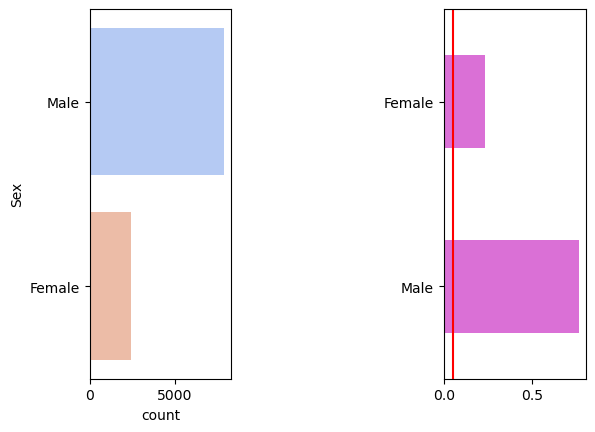

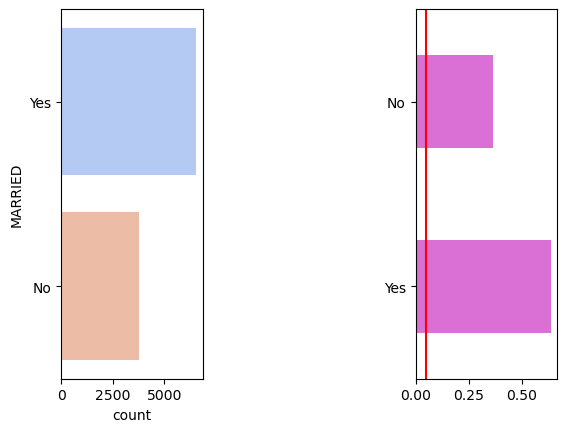

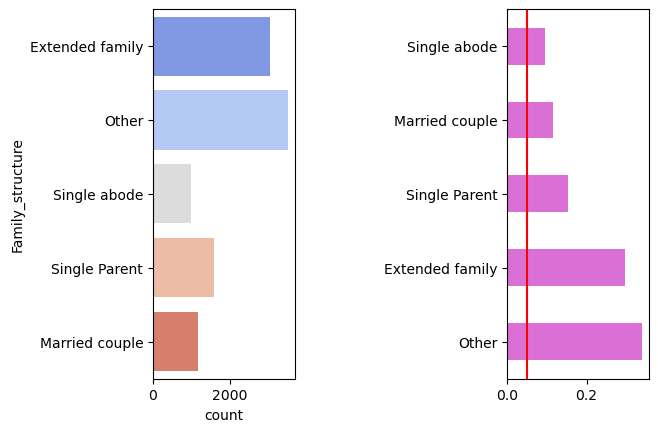

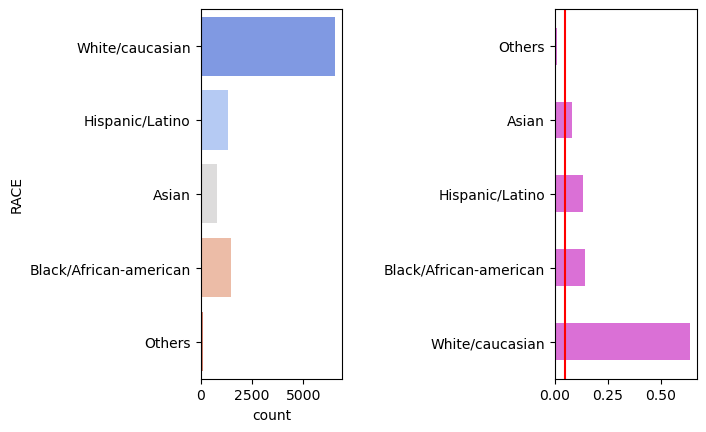

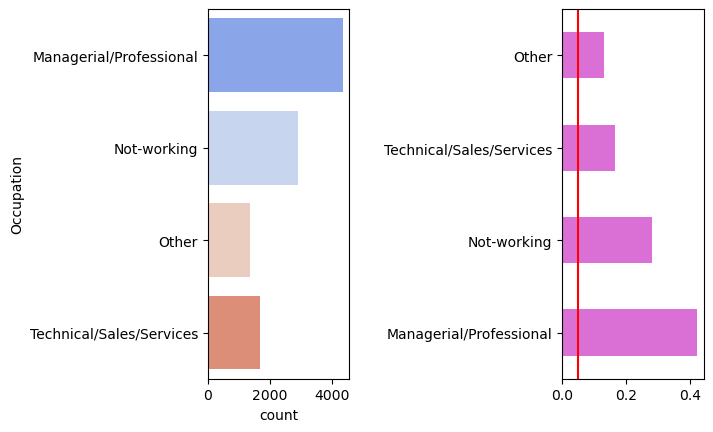

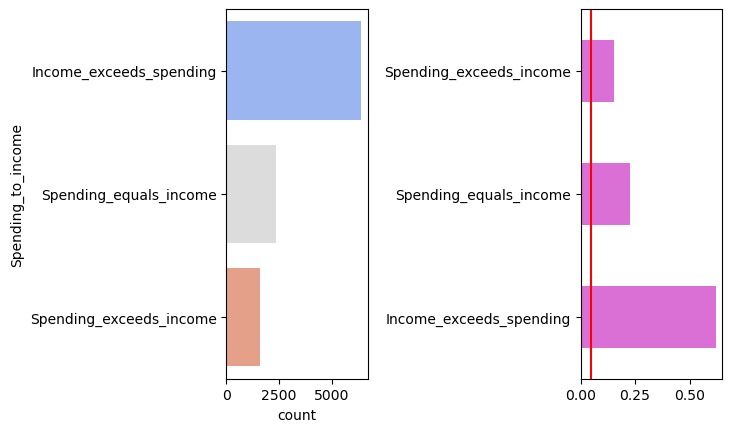

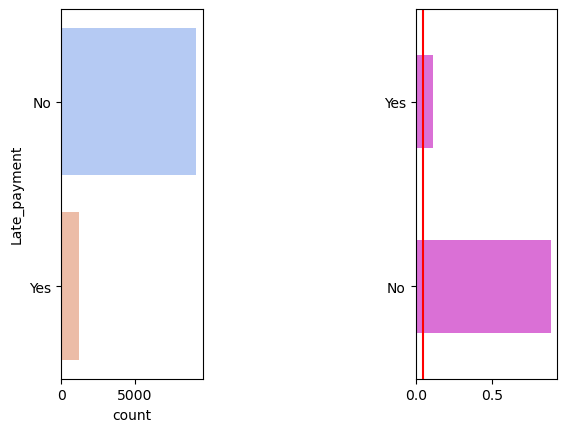

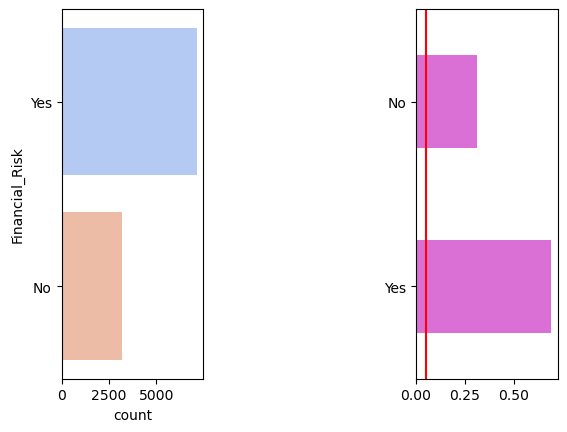

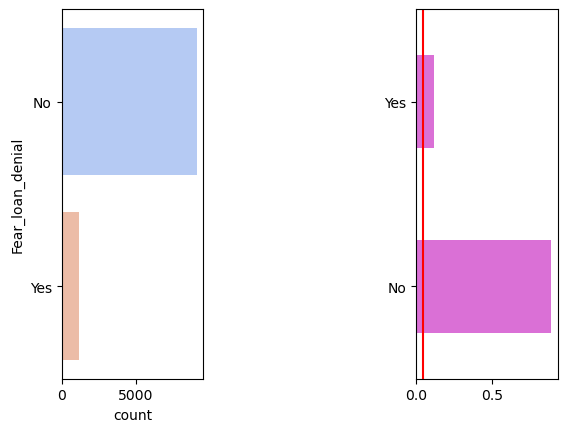

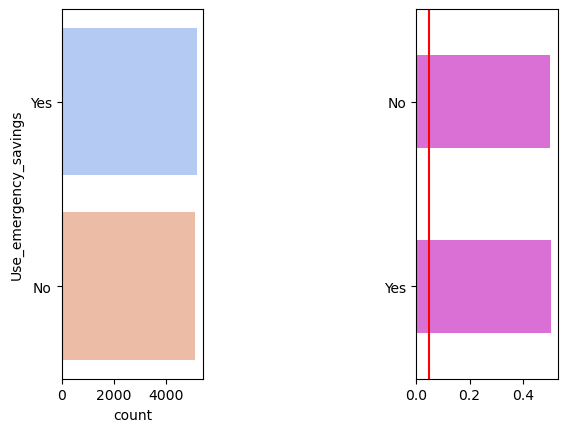

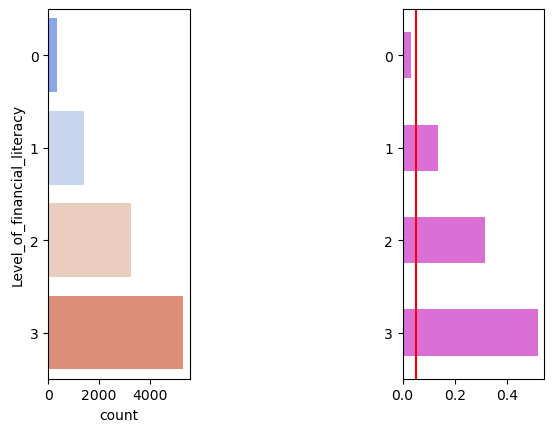

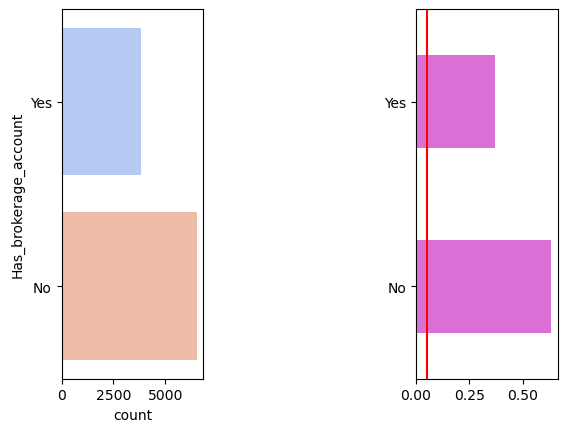

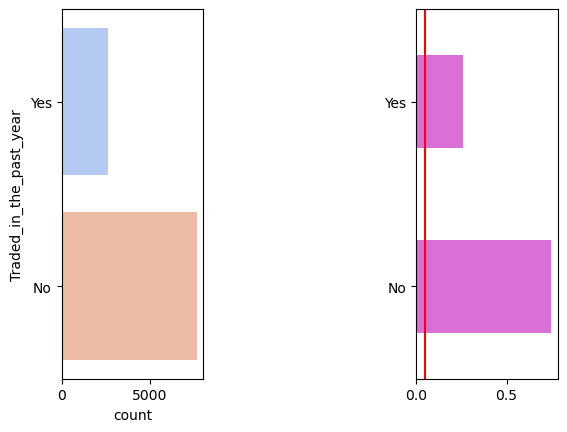

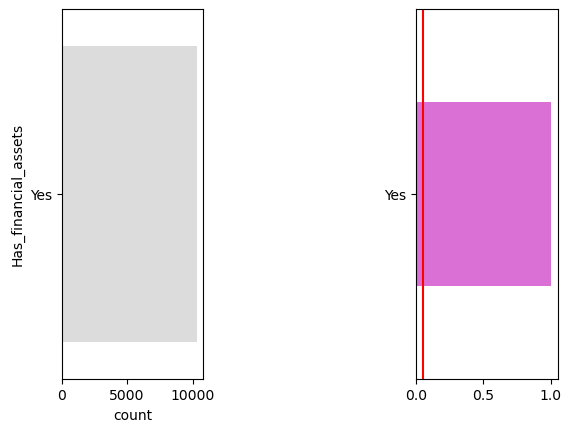

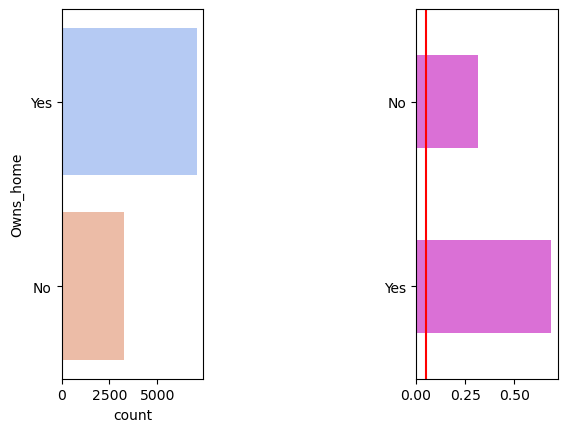

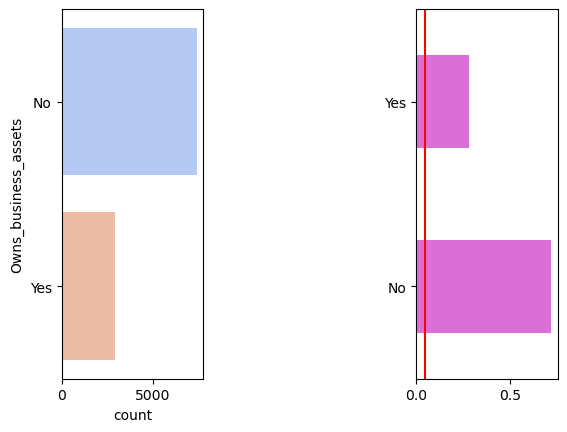

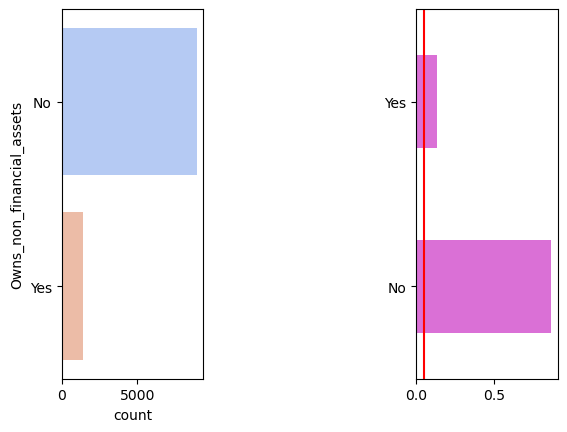

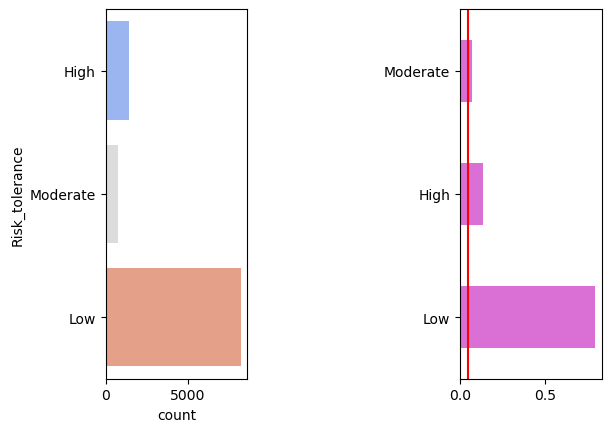

In [45]:
for column in discrete:
    
    fig, ax = plt.subplots(1,2)
       
    sns.countplot(data = df, y = column, palette = 'coolwarm', ax = ax[0])
    
    df[column].value_counts(normalize = True).plot(kind = 'barh', ax = ax[1], color = 'orchid')
    
    ax[1].axvline(0.05, color = 'red')
    
    plt.subplots_adjust(wspace = 1.5)

## Univariate analysis and numerical distribution

In [46]:
numerical = [column for column in df.columns if column not in discrete]

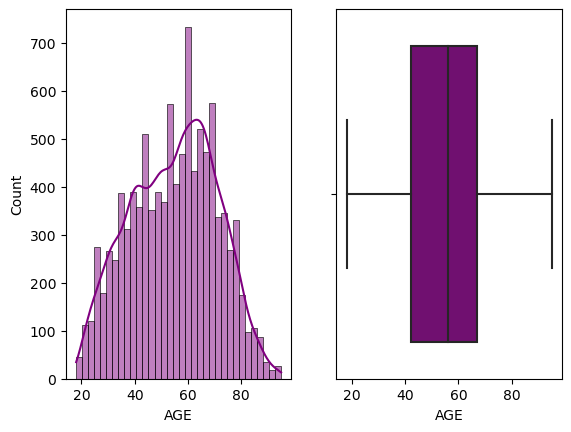

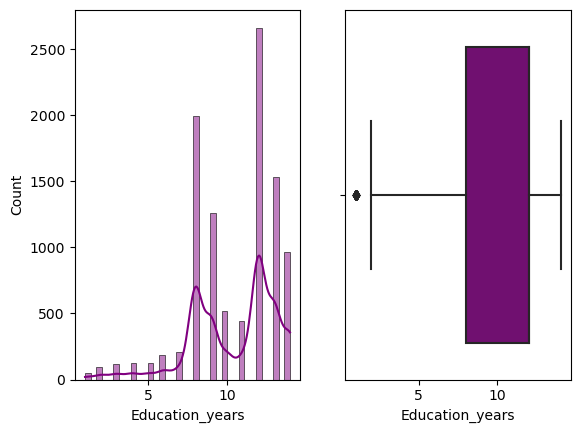

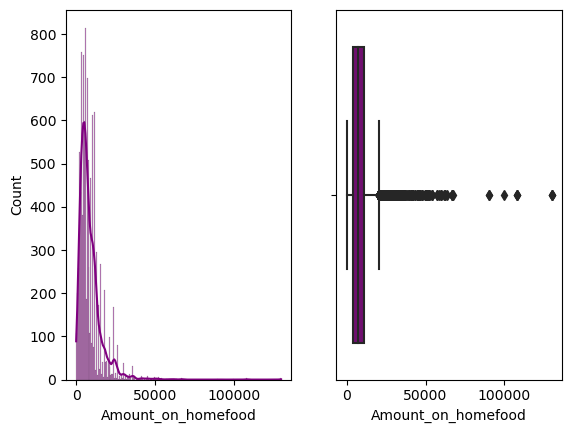

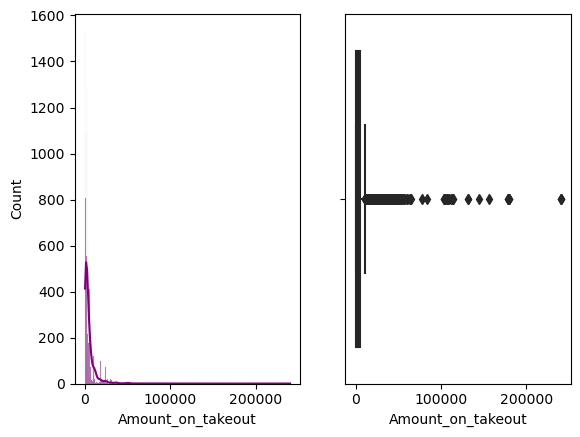

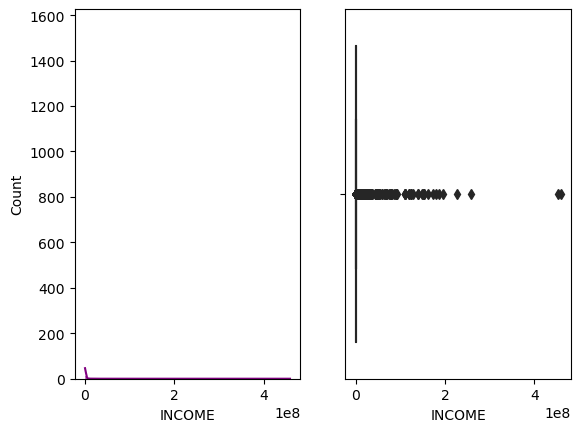

In [49]:
for column in numerical:
    
    fig, ax = plt.subplots(1,2)
    
    sns.histplot(data = df, x = column, color = 'purple', ax = ax[0], kde = True)
    
    sns.boxplot(data = df, x = column, color = 'purple', ax = ax[1])

## Bivariate analysis 

## Numerical vs categorcal

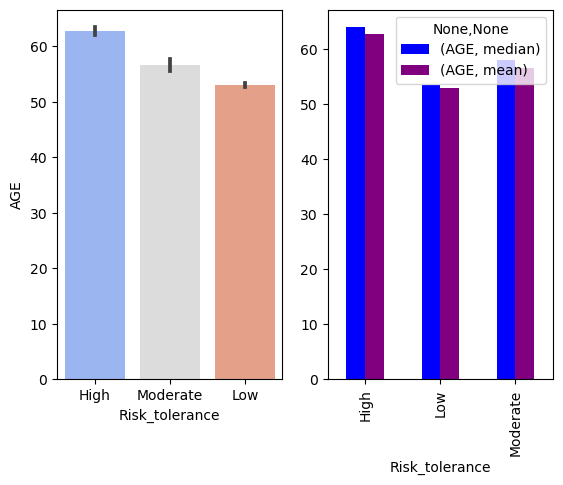

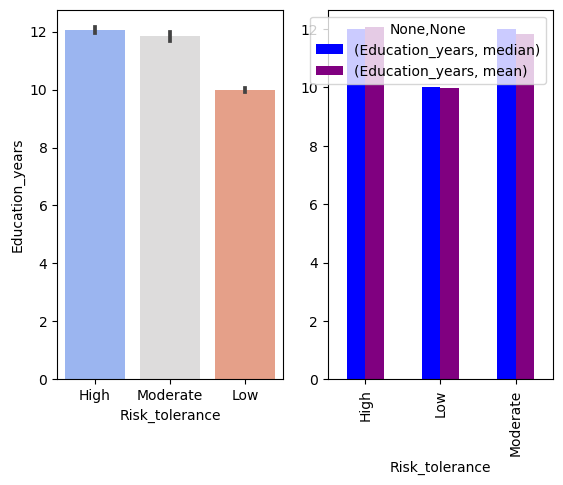

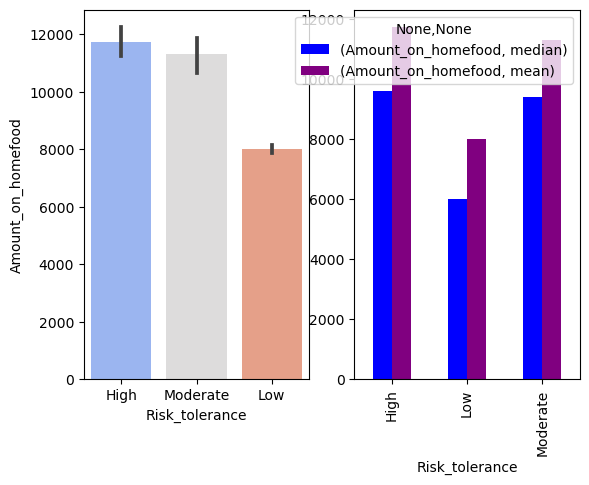

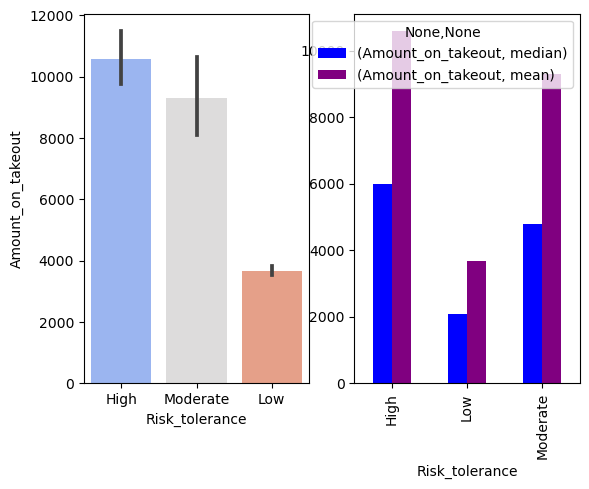

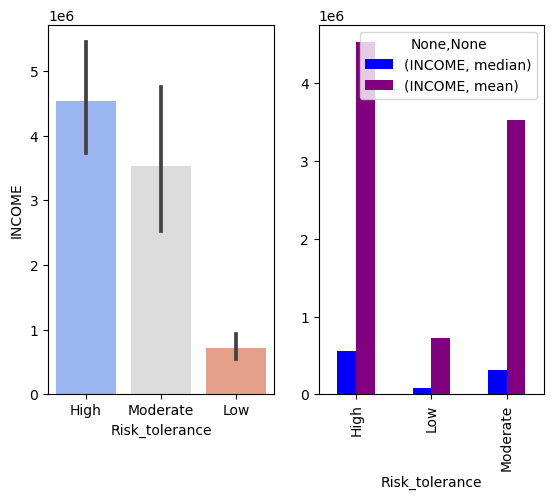

In [52]:
for column in numerical:
    
    fig, ax = plt.subplots(1,2)
    
    sns.barplot(data = df, x = target, y = column, palette = 'coolwarm', ax = ax[0])
    
    df.groupby(target).agg({column:['median', 'mean']}).plot(kind = 'bar', ax = ax[1], color = ['blue', 'purple'])

## Linear Separability

In [75]:
# random_cols = list(np.random.choice(list(discrete.keys()), size  = 5)) + [target]

# numerical

['AGE', 'Education_years', 'Amount_on_homefood', 'Amount_on_takeout', 'INCOME']

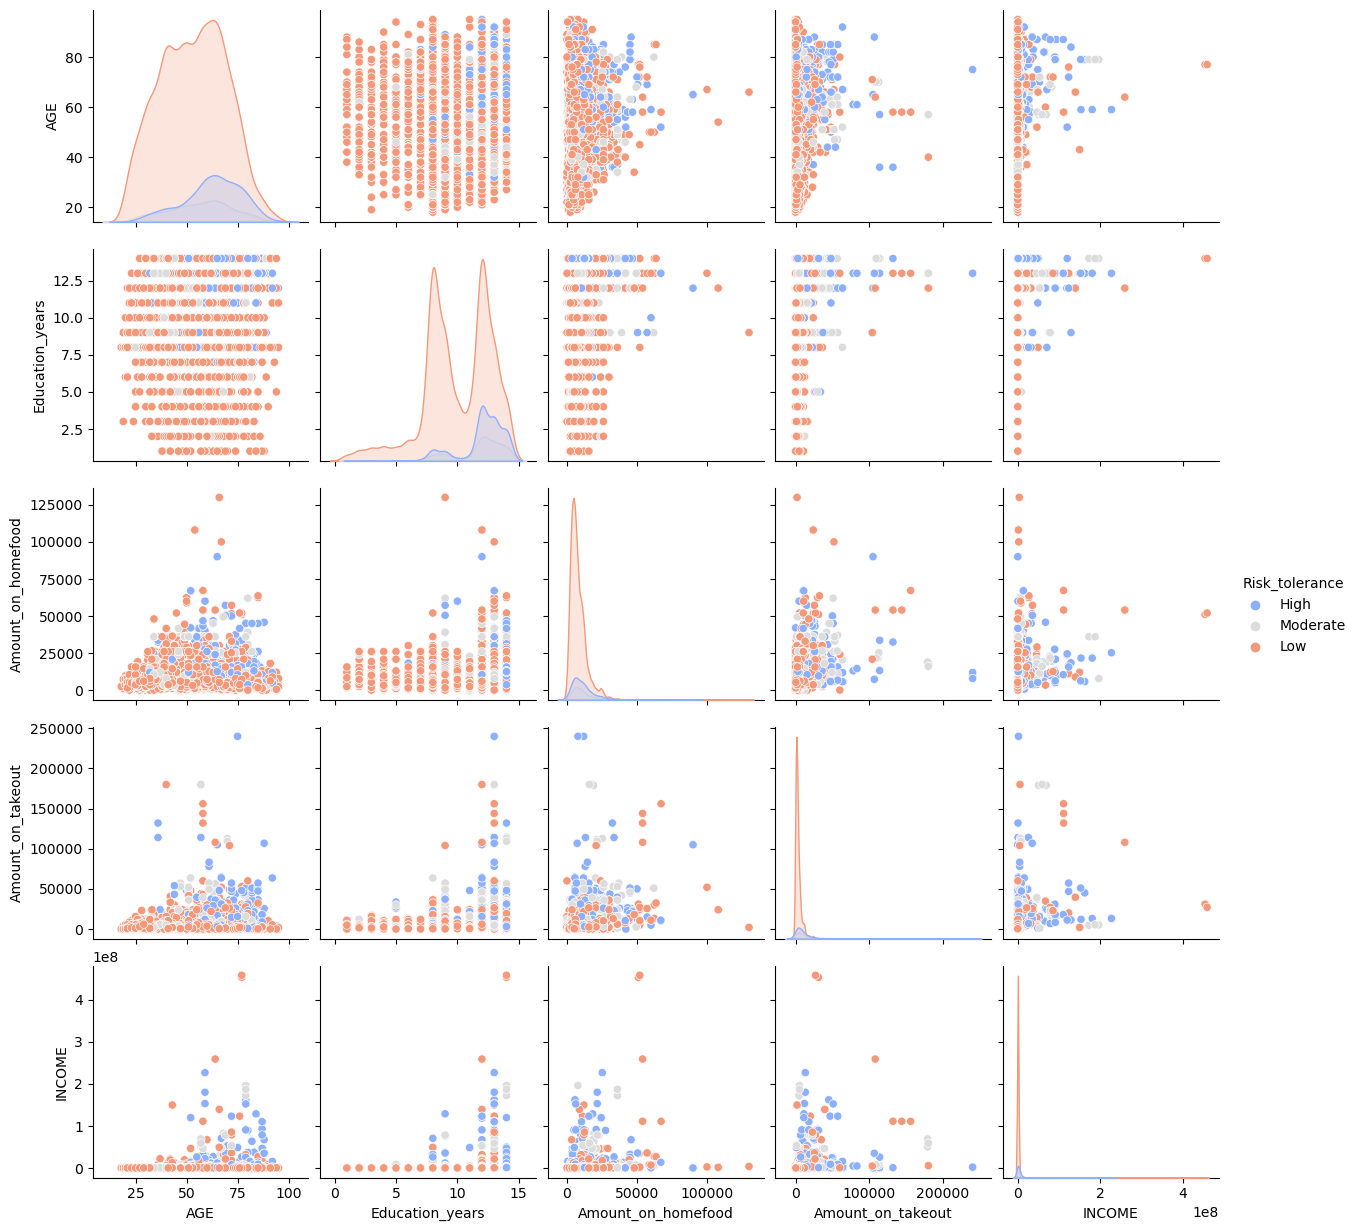

In [78]:
sns.pairplot(data = df[numerical + [target]], hue = target, palette = 'coolwarm')

## Stats

In [81]:
means = []
medians = []
skew = []
names = []

for column in numerical:
    
    names.append(column)
    
    mean_ = df[column].mean()
    means.append(mean_)
    
    median_ = df[column].median()
    medians.append(median_)

    if mean_ == median_:
        
        skew.append('Normal')
        
    elif mean_ > median_:
        
        skew.append('Right Skew')
        
    else:
        
        skew.append('Left skew')
        
        
pd.DataFrame({
    'Feature':names,
    'Mean':means,
    'Median':medians,
    'Skew':skew,
    
})

,Feature,Mean,Median,Skew
0,AGE,5.459276e+01,56.000000,Left skew
1,Education_years,1.040126e+01,12.000000,Left skew
2,Amount_on_homefood,8.748989e+03,7200.000000,Right Skew
3,Amount_on_takeout,4.997796e+03,2400.000000,Right Skew
4,INCOME,1.432315e+06,94363.602204,Right Skew


## Correlation

In [83]:
def correlation(data, method):
    
    corr = data.corr(method = method)
    
    mask = np.triu(corr)
    
    sns.heatmap(corr, annot = True, mask = mask)
    
    plt.show()

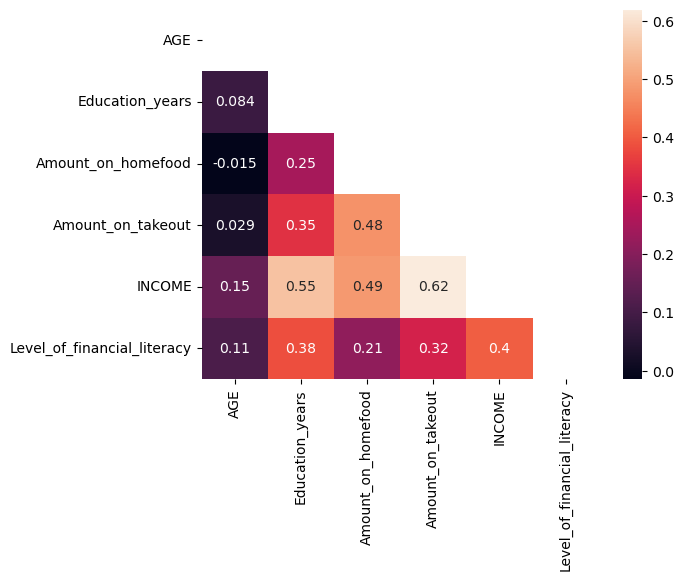

In [84]:
correlation(df, 'spearman')

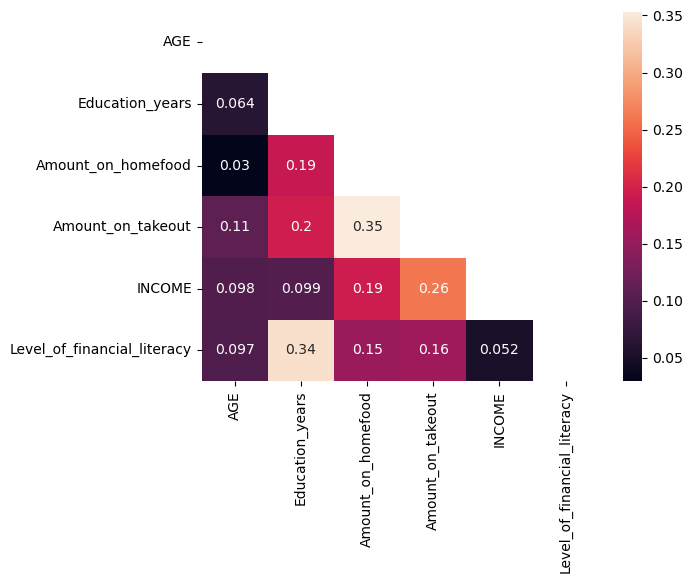

In [85]:
correlation(df, 'pearson')

## Normality 

### Shapiro-Wilk
h0: The data is normal

In [87]:
{column: scipy.stats.shapiro(df[column])[1] < 0.05 for column in numerical }

{'AGE': True,
 'Education_years': False,
 'Amount_on_homefood': True,
 'Amount_on_takeout': True,
 'INCOME': True}

### Q-Q plot

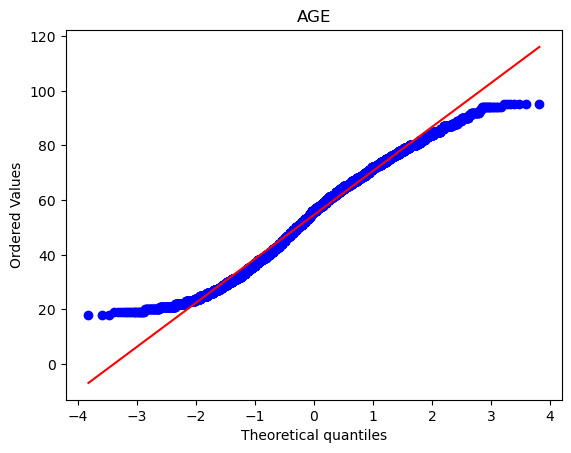

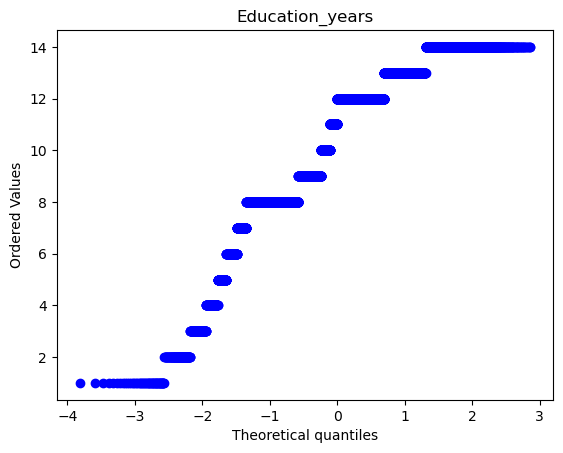

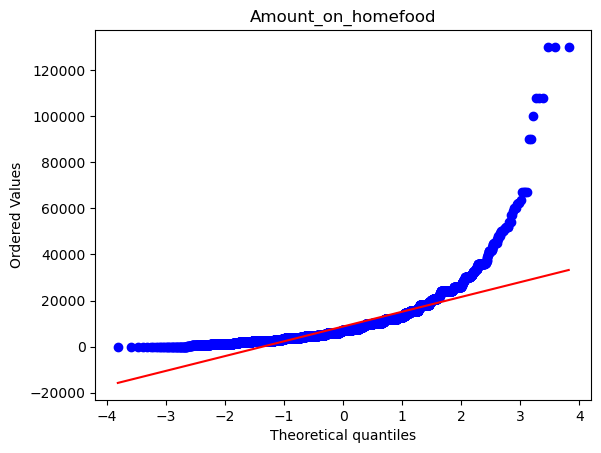

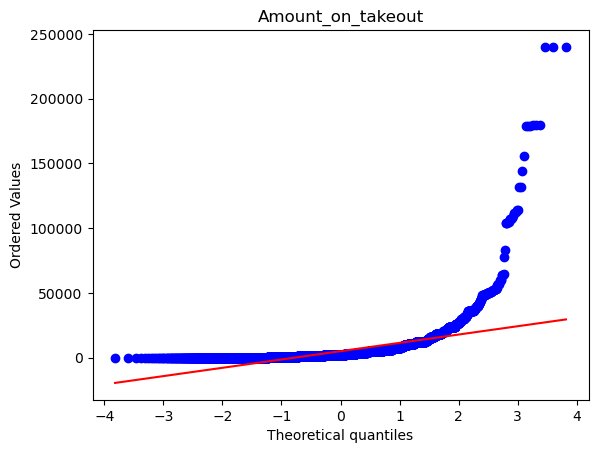

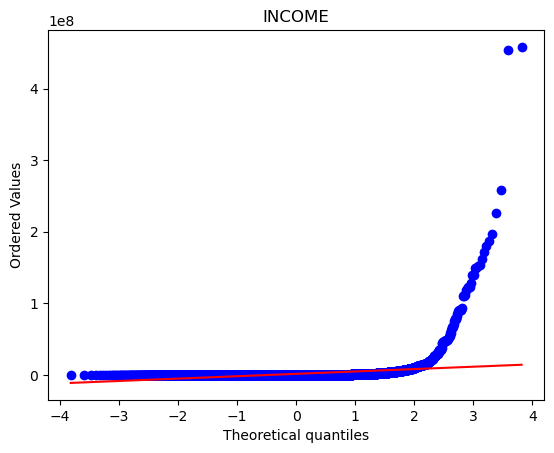

In [91]:
for column in numerical:
    
    plt.figure()
    
    scipy.stats.probplot(df[column], dist = 'norm', plot = plt)
    
    plt.title(column)

## Outliers - IQR

In [94]:
for column in numerical:
    
    Q3 = df[column].quantile(0.75)
    Q1 = df[column].quantile(0.25)
    
    IQR = Q3 - Q1
    
    upper_limit = Q3 + (1.5*IQR)
    
    lower_limit = Q1 - (1.5*IQR)
    
    outliers = df.loc[np.where(df[column] > upper_limit, True, np.where(df[column] < lower_limit, True, False))]
    
    print(f'{column.upper()} has {round(len(outliers)/len(df),2)}% outliers')

AGE has 0.0% outliers
EDUCATION_YEARS has 0.01% outliers
AMOUNT_ON_HOMEFOOD has 0.06% outliers
AMOUNT_ON_TAKEOUT has 0.1% outliers
INCOME has 0.15% outliers


# Data cleaning

In [95]:
reduced_train.shape

(10306, 132)

## Remove columns

In [97]:
def remove_columns(df):
    
    # remove payment and loan information
    temp = df.loc[:, :'HASSET']

    temp['Risk_tolerance'] = df['Risk_tolerance']

    # remove similar columns or unnecessary columns e.g. AGE and AgeCL

    to_remove = ['WGT', 'AGECL', 'EDCL', 'LIFECL', 'RACECL', 'RACECL4', 'RACECL5',
                'WAGEINC', 'BUSSEFARMINC', 'INTDIVINC', 'SSRETINC', 'NORMINC','PENACCTWD',
                 'NORMINC', 'SAVED', 'HBORRFF', 'HSAVFIN', 'KNOWL' 'ISHOPNONE','BFRIENDWORK',
                 'BOTHER', 'IFINPRO','IDONT','IOTHER','BFINPLAN','IFINPLAN','CHECKING','CANTMANG',
                 'HMMA','HCALL','STMUTF','NMMF','HNMMF','HSTOCKS','NSTOCKS','NOTXBND',
                 'GOVTBND','HBOND','IRAKH','THRIFT','RETQLIQ','HRETQLIQ','HCASHLI','HOTHMA','EQUITY',
                 'HEQUITY','DEQ', 'RETEQ','NTRAD','FIN', 'NOWN','VLEASE','NVEHIC','NEWCAR1'
                 'NEWCAR2','HOUSES','ORESRE','HORESRE','HNNRESRE','BUS', 'ACTBUS',
                 'NONACTBUS', 'NFIN','HNFIN','NHNFIN','ASSET','HASSET', 'KNOWL','TURNDOWN','TURNFEAR',
                 'ISHOPNONE','IMAGZNEWS','NEWCAR1','NEWCAR2', 'HOUSECL'
                ]

    for column in to_remove:

        if column in temp.columns:

            temp.drop(column, axis = 1, inplace = True)
            
    return temp

In [99]:
reduced_train = remove_columns(reduced_train)
validation = remove_columns(validation)
full_train = remove_columns(full_train)
test = remove_columns(test)

## Rename columns

In [100]:
def _rename_category(data,**kwargs):
    
    """Renames column names and returns dataframe"""
    
    return data.rename(columns = {**kwargs})

In [101]:
def rename_column(data):
    
    df = _rename_category(data, HHSEX='Sex',EDUC = 'Education_years', FAMSTRUCT = 'Family_structure',
              OCCAT2='Occupation', FOODHOME = 'Amount_on_homefood',FOODAWAY = 'Amount_on_takeout',
               WSAVED = 'Spending_to_income',LATE = 'Late_payment',NOFINRISK = 'Financial_Risk',
               FEARDENIAL = 'Fear_loan_denial',EMERGSAV = 'Use_emergency_savings',
               FINLIT='Level_of_financial_literacy',HBROK = 'Has_brokerage_account',HTRAD= 'Traded_in_the_past_year',
                HFIN = 'Has_financial_assets',HHOUSES = 'Owns_home',HOTHNFIN = 'Owns_non_financial_assets',
                HBUS = 'Owns_business_assets'
                
               )

    df = df.reset_index(drop = True)
    
    return df

In [104]:
reduced_train = rename_column(reduced_train)
validation = rename_column(validation)
full_train = rename_column(full_train)
test = rename_column(test)

## Convert to Categorical

In [105]:
def _convert_to_categorical(data, column, replacement):
    
    """
    data:dataset
    column: column name
    replacement: values to replace in dict
    
    Returns:
    Dataframe column
    """
    
    return data[column].replace(replacement)

In [106]:
def convert_cat(df):
    
    df['Sex'] = _convert_to_categorical(df, 'Sex', {1:'Male', 2:'Female'})
    df['MARRIED'] = _convert_to_categorical(df, 'MARRIED', {1:'Yes', 2:'No'})
    df['Family_structure'] = _convert_to_categorical(df, 'Family_structure', {1:'Single abode', 2:'Married couple', 3:'Single Parent', 4:'Extended family',5:'Other'})
    df['RACE'] = _convert_to_categorical(df, 'RACE', {1:'White/caucasian', 2:'Black/African-american', 3:'Hispanic/Latino',4:'Asian', 5:'Others'})
    df['Occupation'] = _convert_to_categorical(df, 'Occupation', {1:'Managerial/Professional', 2:'Technical/Sales/Services', 3: 'Other', 4: 'Not-working'})
    df['Spending_to_income'] = _convert_to_categorical(df, 'Spending_to_income', {1:'Spending_exceeds_income', 2:'Spending_equals_income',3:'Income_exceeds_spending'})

    for column in binary:

        if column != 'Financial_Risk':

            df[column] = _convert_to_categorical(df, column, {0: 'No', 1:'Yes'})

        else:

            df[column] = _convert_to_categorical(df, column, {0: 'Yes', 1:'No'})
            
    return df

In [108]:
reduced_train = convert_cat(reduced_train)
validation = convert_cat(validation)
full_train = convert_cat(full_train)
test = convert_cat(test)

# Dummy Baseline Model

## Split Train

In [334]:
xtrain_red = reduced_train.drop(target, axis = 1)
ytrain_red = reduced_train[target]

In [335]:
num_columns = xtrain_red.select_dtypes('number').columns.tolist()
cat_columns = xtrain_red.select_dtypes('O').columns.tolist()

In [336]:
cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder()),
    ('imputer', SimpleImputer(strategy = 'most_frequent'))
])

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median'))
])

dummy_preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_columns),
    ('cat', cat_pipeline, cat_columns)
],verbose_feature_names_out = False )

In [337]:
xtrain_red_dummy = dummy_preprocessor.fit_transform(xtrain_red)

In [338]:
xtrain_red_dummy[:2]

,AGE,Education_years,Amount_on_homefood,Amount_on_takeout,INCOME,Level_of_financial_literacy,Sex_1,Sex_2,MARRIED_1,MARRIED_2,Family_structure_1,Family_structure_2,Family_structure_3,Family_structure_4,Family_structure_5,RACE_1,RACE_2,RACE_3,RACE_4,RACE_5,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Spending_to_income_1,Spending_to_income_2,Spending_to_income_3,Late_payment_1,Late_payment_2,Financial_Risk_1,Financial_Risk_2,Fear_loan_denial_1,Fear_loan_denial_2,Use_emergency_savings_1,Use_emergency_savings_2,Has_brokerage_account_1,Has_brokerage_account_2,Traded_in_the_past_year_1,Traded_in_the_past_year_2,Has_financial_assets_1,Owns_home_1,Owns_home_2,Owns_business_assets_1,Owns_business_assets_2,Owns_non_financial_assets_1,Owns_non_financial_assets_2
0,53.0,12.0,8400.0,2400.0,565316.88377,3.0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0
1,63.0,12.0,3600.0,3600.0,44317.38477,3.0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,1,0,1,0,0,1


In [339]:
dummy = DummyClassifier()

dummy.fit(xtrain_red_dummy, ytrain_red)

DummyClassifier()

In [340]:
baseline = pd.DataFrame({
    'Name':'Baseline',
    'Accuracy':cross_val_score(dummy, xtrain_red_dummy, ytrain_red, cv = 3, scoring = 'accuracy').mean(),
    'Precision':cross_val_score(dummy, xtrain_red_dummy, ytrain_red, cv = 3, scoring = 'precision_weighted').mean(),
    'Recall':cross_val_score(dummy, xtrain_red_dummy, ytrain_red, cv = 3, scoring = 'recall_weighted').mean(),
    'f1':cross_val_score(dummy, xtrain_red_dummy, ytrain_red, cv = 3, scoring = 'f1_weighted').mean(),
    'Auc':cross_val_score(dummy, xtrain_red_dummy, ytrain_red, cv = 3, scoring = 'roc_auc_ovr_weighted').mean(),
    
}, index = [0])

baseline

,Name,Accuracy,Precision,Recall,f1,Auc
0,Baseline,0.794295,0.630904,0.794295,0.703233,0.5


# Model building

In [131]:
models = []

models.append( ('Tree', DecisionTreeClassifier()) )
models.append( ('LogReg', LogisticRegression()) )
models.append( ('Xgboost', xgb.XGBClassifier()) )
models.append( ('ExtraTrees', ExtraTreesClassifier()) )
models.append( ('Adaboost', AdaBoostClassifier()) )
models.append( ('KNN', KNeighborsClassifier()) )

In [148]:
def _model_plot(ytrain, yproba):
    
        print(classification_report(ytrain, yproba))
        
        cm = confusion_matrix(ytrain,yproba)
        
        ConfusionMatrixDisplay(cm).plot();plt.show()        

In [151]:
def model_evaluation(xtrain, ytrain, experiment_number, models = models):
    
    names = []
    accuracy = []
    precision = []
    recall = []
    f1 = []
    auc = []
    
    for name,model in models:
        
        names.append(name)
        
        print(name)
        
        acc = cross_val_score(model, xtrain, ytrain, cv = 3, scoring = 'accuracy')
        accuracy.append(acc.mean())
        
        prec = cross_val_score(model, xtrain, ytrain, cv = 3, scoring = 'precision_weighted')
        precision.append(prec.mean())
        
        rec = cross_val_score(model, xtrain, ytrain, cv = 3, scoring = 'recall_weighted')
        recall.append(rec.mean())
        
        f1_ = cross_val_score(model, xtrain, ytrain, cv = 3, scoring = 'f1_weighted')
        f1.append(f1_.mean())
        
        auc_ = cross_val_score(model, xtrain, ytrain, cv = 3, scoring = 'roc_auc_ovr_weighted')
        auc.append(auc_.mean())
        
        yproba = cross_val_predict(model, xtrain, ytrain, cv = 3)
        
        _model_plot(ytrain, yproba)
        
    return pd.DataFrame({
        'Name': [name+str(experiment_number) for name in names],
        'Accuracy':accuracy,
        'Precision':precision,
        'Recall':recall,
        'f1':f1,
        'Auc':auc,
        
    })   

In [250]:
xtrain_red = reduced_train.drop(target, axis = 1)
ytrain_red = reduced_train[target]

xtrain_red.shape

(10306, 22)

## Experiment 0:

- Missing Values: Drop
- Encoding: One-Hot
- Transformation: None
- Scaling: None
- Sampling: None
- Feature Selection: None

In [251]:
temp = reduced_train.dropna()

xtrain_0 = temp.drop(target, axis = 1)
ytrain_0 = temp[target]

xtrain_0.shape

(10285, 22)

In [157]:
map_target = {'High':2,
             'Moderate':1,
             'Low':0}

ytrain_0 = ytrain_0.map(map_target)

In [158]:
cat_pipeline = Pipeline([
    ('encoding', OneHotEncoder())
])

preprocessor_0 = ColumnTransformer([
    ('cat_pipeline', cat_pipeline, cat_columns)
], verbose_feature_names_out = True)

xtrain_0 = preprocessor_0.fit_transform(xtrain_0)

Tree
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      8165
           1       0.45      0.26      0.33       726
           2       0.56      0.49      0.52      1394

    accuracy                           0.83     10285
   macro avg       0.63      0.56      0.59     10285
weighted avg       0.81      0.83      0.81     10285



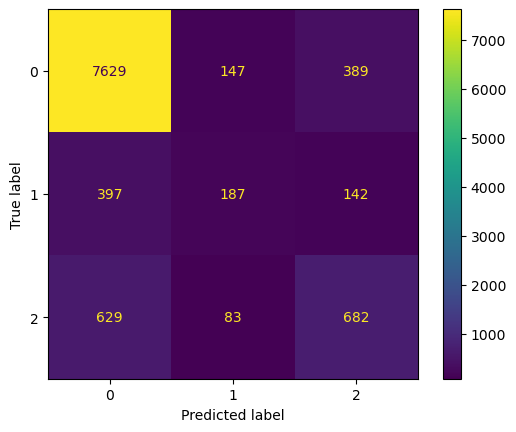

LogReg
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      8165
           1       0.00      0.00      0.00       726
           2       0.43      0.26      0.32      1394

    accuracy                           0.80     10285
   macro avg       0.42      0.40      0.40     10285
weighted avg       0.72      0.80      0.75     10285



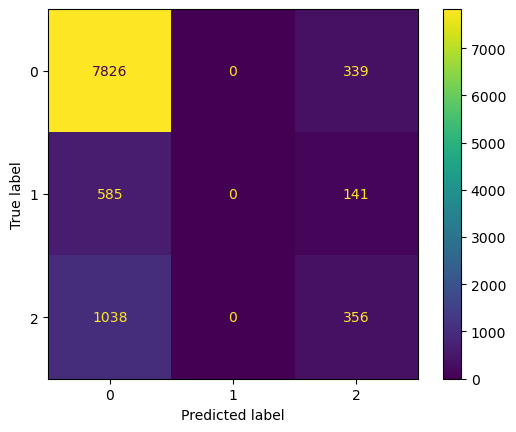

Xgboost
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      8165
           1       0.49      0.19      0.27       726
           2       0.56      0.49      0.52      1394

    accuracy                           0.83     10285
   macro avg       0.64      0.54      0.57     10285
weighted avg       0.80      0.83      0.81     10285



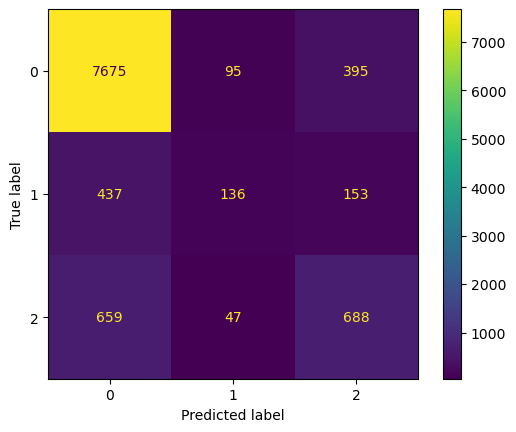

ExtraTrees
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      8165
           1       0.50      0.25      0.33       726
           2       0.58      0.48      0.53      1394

    accuracy                           0.83     10285
   macro avg       0.65      0.56      0.59     10285
weighted avg       0.81      0.83      0.82     10285



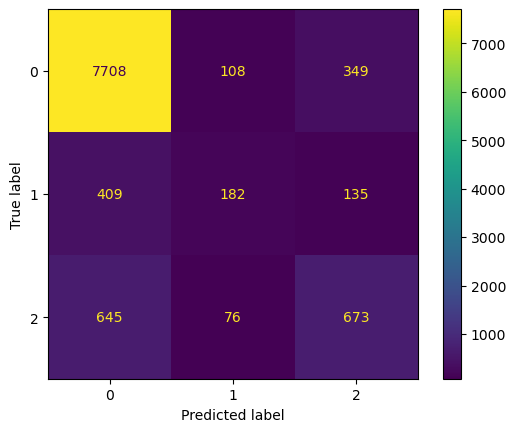

Adaboost
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      8165
           1       0.00      0.00      0.00       726
           2       0.42      0.27      0.33      1394

    accuracy                           0.80     10285
   macro avg       0.42      0.41      0.41     10285
weighted avg       0.72      0.80      0.75     10285



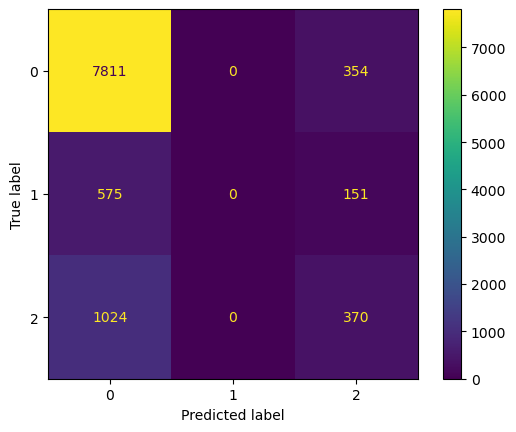

KNN
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      8165
           1       0.35      0.16      0.22       726
           2       0.48      0.40      0.44      1394

    accuracy                           0.80     10285
   macro avg       0.56      0.50      0.52     10285
weighted avg       0.77      0.80      0.78     10285



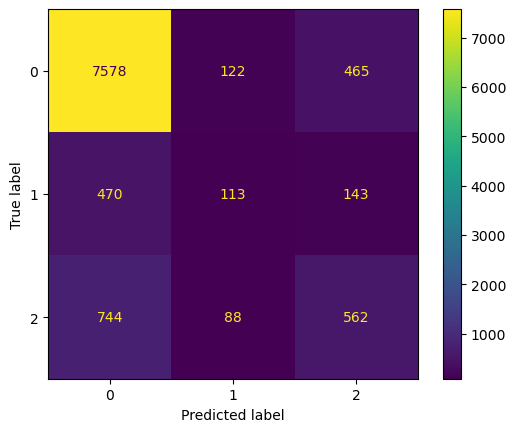

,Name,Accuracy,Precision,Recall,f1,Auc
0,Tree0,0.826642,0.810119,0.826545,0.814608,0.892587
1,LogReg0,0.795528,0.715375,0.795528,0.748623,0.857906
2,Xgboost0,0.826349,0.805027,0.826349,0.809567,0.906414
3,ExtraTrees0,0.832378,0.812938,0.832378,0.818510,0.906049
4,Adaboost0,0.795430,0.716368,0.795430,0.749870,0.854508
5,KNN0,0.802431,0.774754,0.802431,0.784107,0.849213


In [159]:
metrics_0 = model_evaluation(xtrain = xtrain_0, ytrain = ytrain_0, experiment_number = 0)

metrics_0

## Experiment 1:

- Missing Values: Simple
- Encoding: One-Hot
- Transformation: Log
- Scaling: StandardSclaer
- Sampling: OverSampling
- Feature Selection: Lasso

In [285]:
xtrain_red = reduced_train.drop(target, axis = 1)
ytrain_red = reduced_train[target]

In [286]:
map_target = {'High':2,
             'Moderate':1,
             'Low':0}

ytrain_red = ytrain_red.map(map_target)

In [252]:
xtrain_1 = xtrain_red.copy()
ytrain_1 = ytrain_red.copy()

xtrain_1.shape

(10306, 22)

In [206]:
def log_trans(dataframe):
    
    for column in dataframe:
        
        if 0 in dataframe[column]:
            
            dataframe[column] = dataframe[column].apply(np.log1p)
            
        else:
            
            dataframe[column]  = dataframe[column] .apply(np.log)
            
    return dataframe

log_transformer = FunctionTransformer(log_trans)

In [207]:
num_pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('transformation',log_transformer),
    ('imputer',SimpleImputer(strategy = 'median')),

])

cat_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy = 'most_frequent')),
    ('encoder',OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_columns),
    ('cat_pipeline', cat_pipeline, cat_columns)
], verbose_feature_names_out = False)

In [208]:
xtrain_1 = preprocessor.fit_transform(xtrain_1)

In [209]:
# sampling: RandomOverSampling

over_sampler = RandomOverSampler()

In [210]:
xtrain_1, ytrain_1 = over_sampler.fit_resample(xtrain_1, ytrain_1)

In [223]:
# Feature selection: Lasso

lasso = ElasticNet(l1_ratio = 0.1)

lasso.fit(xtrain_1, ytrain_1)

values = {column:np.round(coef,3) for column, coef in zip(xtrain_1.columns, lasso.coef_)}

selected_columns_1 = [column for column,val in values.items() if abs(val)>0]

selected_columns_1

['Education_years',
 'Amount_on_homefood',
 'Amount_on_takeout',
 'Has_brokerage_account_1',
 'Has_brokerage_account_2',
 'Traded_in_the_past_year_1',
 'Traded_in_the_past_year_2']

In [224]:
xtrain_1 = xtrain_1[selected_columns_1]

Tree
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      8186
           1       0.90      0.97      0.93      8186
           2       0.92      0.93      0.93      8186

    accuracy                           0.93     24558
   macro avg       0.94      0.93      0.93     24558
weighted avg       0.94      0.93      0.93     24558



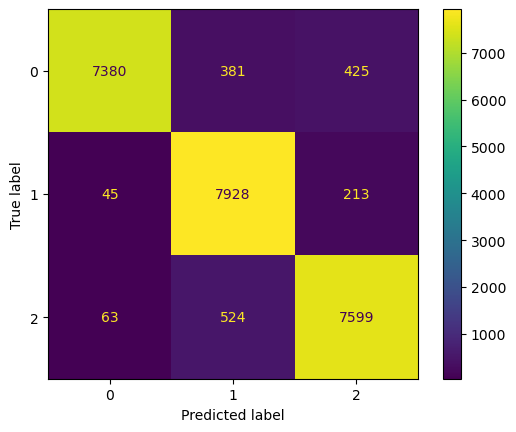

LogReg
              precision    recall  f1-score   support

           0       0.75      0.76      0.75      8186
           1       0.45      0.46      0.45      8186
           2       0.49      0.48      0.49      8186

    accuracy                           0.57     24558
   macro avg       0.56      0.57      0.56     24558
weighted avg       0.56      0.57      0.56     24558



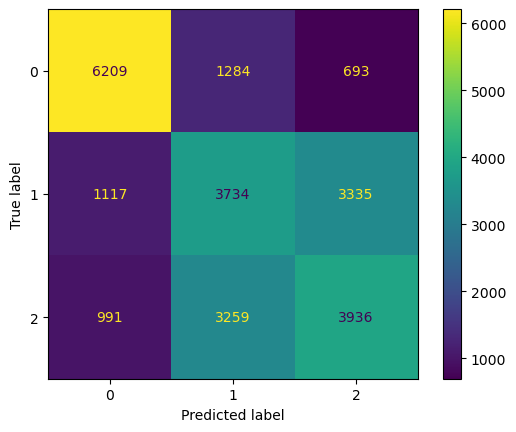

Xgboost
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      8186
           1       0.85      0.94      0.89      8186
           2       0.88      0.87      0.88      8186

    accuracy                           0.88     24558
   macro avg       0.89      0.88      0.88     24558
weighted avg       0.89      0.88      0.88     24558



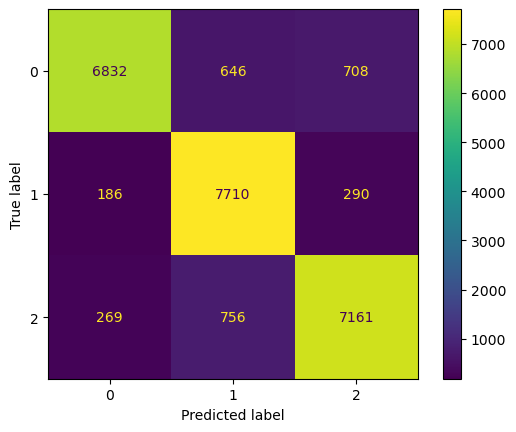

ExtraTrees
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      8186
           1       0.90      0.97      0.94      8186
           2       0.93      0.93      0.93      8186

    accuracy                           0.94     24558
   macro avg       0.94      0.94      0.94     24558
weighted avg       0.94      0.94      0.94     24558



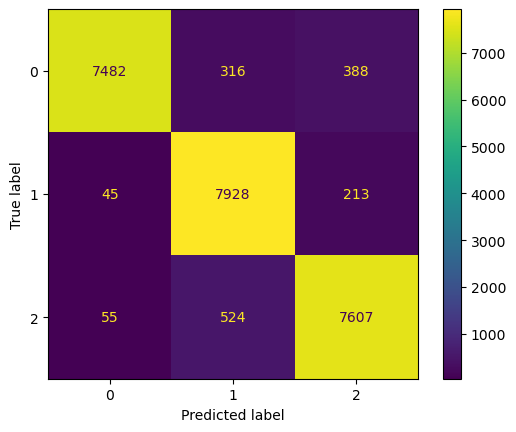

Adaboost
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      8186
           1       0.50      0.48      0.49      8186
           2       0.52      0.51      0.52      8186

    accuracy                           0.59     24558
   macro avg       0.58      0.59      0.59     24558
weighted avg       0.58      0.59      0.59     24558



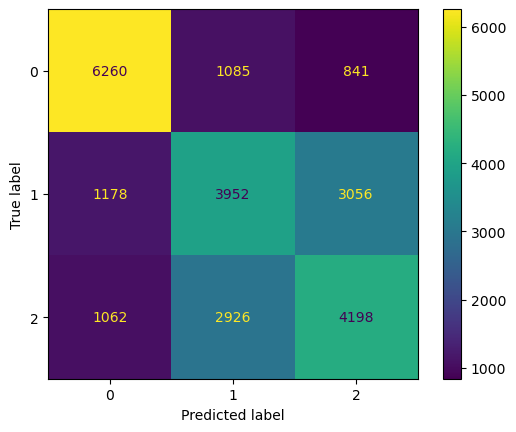

KNN
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      8186
           1       0.87      0.89      0.88      8186
           2       0.87      0.88      0.87      8186

    accuracy                           0.86     24558
   macro avg       0.86      0.86      0.86     24558
weighted avg       0.86      0.86      0.86     24558



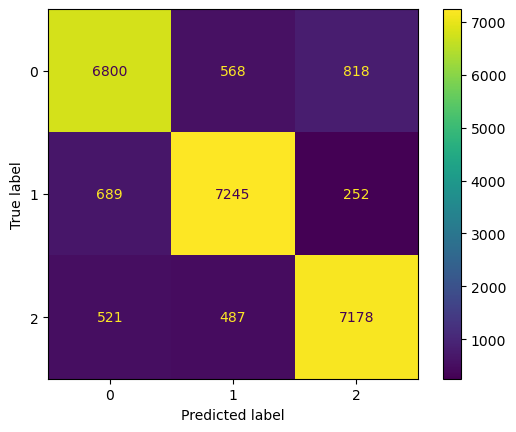

,Name,Accuracy,Precision,Recall,f1,Auc
0,Tree1,0.932853,0.935163,0.933016,0.932880,0.980027
1,LogReg1,0.565152,0.563957,0.565152,0.564473,0.748823
2,Xgboost1,0.883745,0.887162,0.883745,0.883585,0.969773
3,ExtraTrees1,0.937169,0.939166,0.937006,0.937256,0.990784
4,Adaboost1,0.586774,0.583769,0.586774,0.585113,0.768911
5,KNN1,0.864199,0.864564,0.864199,0.864029,0.958517


In [225]:
metrics_1 = model_evaluation(xtrain = xtrain_1, ytrain = ytrain_1, experiment_number = 1)

metrics_1

## Experiment 2:

- Missing Values: fill with Values at the end of the distribution
- Encoding: Ordinal
- Transformation: Sqrt
- Scaling: RobustScaler
- Sampling: Undersampling
- Feature Selection: selectFromModel(xgboost)

In [227]:
xtrain_2 = xtrain_red.copy()
ytrain_2 = ytrain_red.copy()

In [228]:
def end_of_dist_imputer(dataframe):
    
    for column in dataframe:
        
        q95 = dataframe[column].quantile(0.95)
        
        dataframe[column] = np.where(dataframe[column].isnull(), q95, dataframe[column])
        
    return dataframe

func_end_of_dist_imputer = FunctionTransformer(end_of_dist_imputer)

In [229]:
num_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('transformation',FunctionTransformer(np.sqrt)),
    ('imputer', func_end_of_dist_imputer),

])

cat_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy = 'most_frequent')),
    ('encoder',OrdinalEncoder())
])

preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_columns),
    ('cat_pipeline', cat_pipeline, cat_columns)
], verbose_feature_names_out = False)

In [230]:
xtrain_2 = preprocessor.fit_transform(xtrain_2)

In [231]:
# sampling: Undersampling

undersampler = RandomUnderSampler()

xtrain_2, ytrain_2 = undersampler.fit_resample(xtrain_2, ytrain_2)

In [245]:
# Feature selection: SelectFromModel(Xgbooost)

selector = SelectFromModel(estimator = xgb.XGBClassifier(), threshold = 0.025)

selector.fit(xtrain_2, ytrain_2)

selected_cols2 = xtrain_2.columns[selector.get_support()]

selected_cols2

Index(['AGE', 'INCOME', 'Sex', 'RACE', 'Late_payment', 'Financial_Risk',
       'Fear_loan_denial', 'Use_emergency_savings', 'Has_brokerage_account',
       'Owns_home', 'Owns_business_assets'],
      dtype='object')

In [246]:
xtrain_2 = xtrain_2[selected_cols2]

Tree
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       726
           1       0.64      0.72      0.68       726
           2       0.68      0.63      0.65       726

    accuracy                           0.68      2178
   macro avg       0.68      0.68      0.68      2178
weighted avg       0.68      0.68      0.68      2178



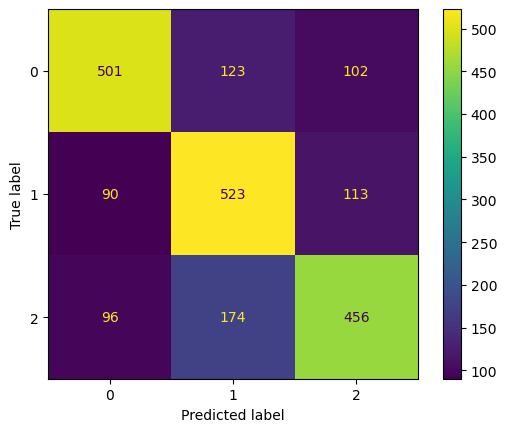

LogReg
              precision    recall  f1-score   support

           0       0.73      0.78      0.75       726
           1       0.49      0.42      0.45       726
           2       0.49      0.53      0.51       726

    accuracy                           0.58      2178
   macro avg       0.57      0.58      0.57      2178
weighted avg       0.57      0.58      0.57      2178



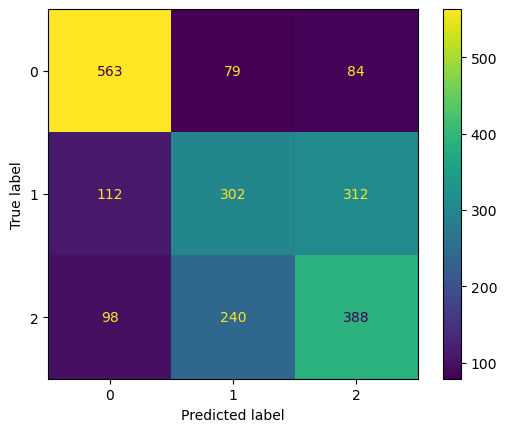

Xgboost
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       726
           1       0.64      0.74      0.69       726
           2       0.67      0.63      0.65       726

    accuracy                           0.70      2178
   macro avg       0.70      0.70      0.70      2178
weighted avg       0.70      0.70      0.70      2178



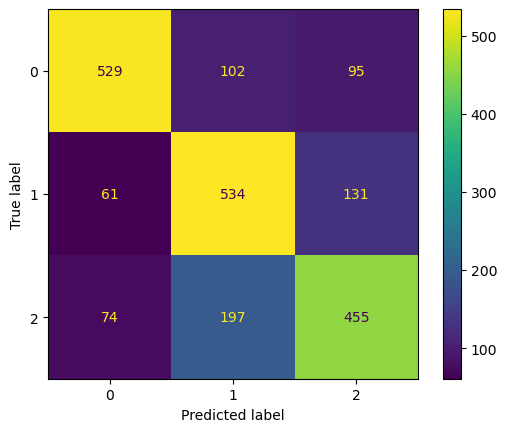

ExtraTrees
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       726
           1       0.66      0.75      0.70       726
           2       0.70      0.66      0.68       726

    accuracy                           0.71      2178
   macro avg       0.71      0.71      0.71      2178
weighted avg       0.71      0.71      0.71      2178



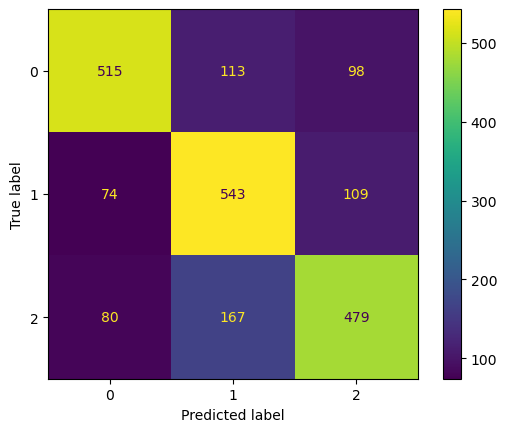

Adaboost
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       726
           1       0.51      0.47      0.49       726
           2       0.54      0.56      0.55       726

    accuracy                           0.60      2178
   macro avg       0.60      0.60      0.60      2178
weighted avg       0.60      0.60      0.60      2178



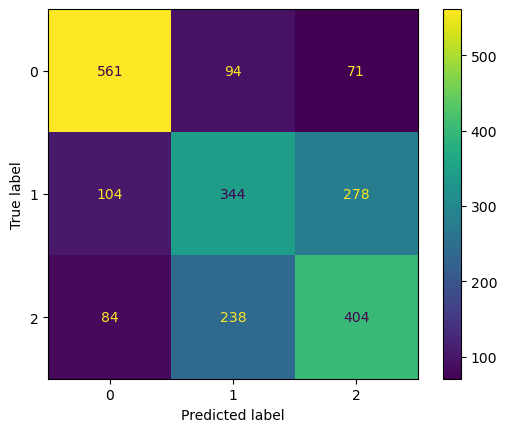

KNN
              precision    recall  f1-score   support

           0       0.70      0.73      0.71       726
           1       0.50      0.58      0.54       726
           2       0.55      0.44      0.49       726

    accuracy                           0.58      2178
   macro avg       0.59      0.58      0.58      2178
weighted avg       0.59      0.58      0.58      2178



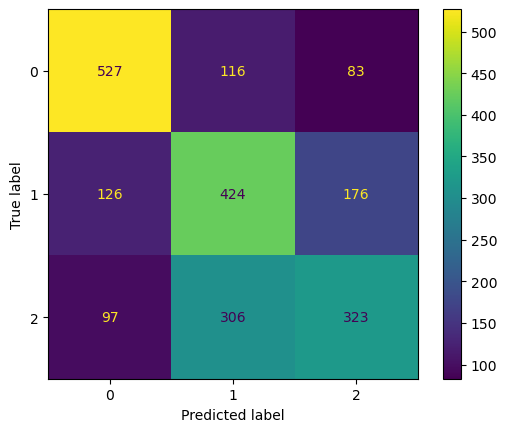

,Name,Accuracy,Precision,Recall,f1,Auc
0,Tree2,0.681818,0.687333,0.681359,0.677519,0.771141
1,LogReg2,0.575298,0.571263,0.575298,0.571248,0.762250
2,Xgboost2,0.696970,0.702248,0.696970,0.697592,0.844634
3,ExtraTrees2,0.705234,0.711132,0.707530,0.710800,0.856416
4,Adaboost2,0.601010,0.599131,0.601010,0.599191,0.764690
5,KNN2,0.584940,0.587232,0.584940,0.582323,0.766218


In [247]:
metrics_2 = model_evaluation(xtrain = xtrain_2, ytrain = ytrain_2, experiment_number = 2)

metrics_2

## Experiment 3:

- Missing Values: Random Sample imputation
- Encoding: Count
- Transformation: Poly
- Scaling: MaxAbsScaler
- Sampling: smote
- Feature Selection: Permutation Importance

In [318]:
xtrain_3 = xtrain_red.copy()
ytrain_3 = ytrain_red.copy()

In [319]:
def random_sample_imputer(dataframe):
    
    for column in dataframe:
        
        number_of_nans =  dataframe[column].isnull().sum()
        
        sample =  dataframe[column].dropna().sample(number_of_nans)
        
        sample.index = dataframe.loc[dataframe[column].isnull(), column].index
        
        dataframe.loc[dataframe[column].isnull(), column] = sample
        
    return dataframe

func_random_sample_imputer = FunctionTransformer(random_sample_imputer)

In [320]:
def count_encoder(dataframe):
    
    for column in dataframe:
        
        my_map = dataframe[column].value_counts(normalize = True).to_dict()
        
        dataframe[column] = dataframe[column].map(my_map)
        
    return dataframe

func_count_encoder = FunctionTransformer(count_encoder)

In [324]:
num_pipeline = Pipeline([
    ('scaler', MaxAbsScaler()),
    ('imputer', func_random_sample_imputer),
    ('transformation',PolynomialFeatures()),


])

cat_pipeline = Pipeline([
    ('encoder',func_count_encoder),
    ('imputer',func_random_sample_imputer),

])

preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_columns),
    ('cat_pipeline', cat_pipeline, cat_columns)
], verbose_feature_names_out = False)

In [325]:
xtrain_3 = preprocessor.fit_transform(xtrain_3)

xtrain_3.shape

(10306, 44)

In [326]:
# smote

smote = SMOTE()

xtrain_3, ytrain_3 = smote.fit_resample(xtrain_3, ytrain_3)

In [327]:
# permutation importance

model = xgb.XGBClassifier().fit(xtrain_3, ytrain_3)

r = permutation_importance(model, xtrain_3, ytrain_3)

values = {column:imp for column, imp in zip(xtrain_3.columns, r.importances_mean)}

values

{'1': 0.0,
 'AGE': 0.00606726932160595,
 'Education_years': 0.0039579770339603915,
 'Amount_on_homefood': 0.004528056030621364,
 'Amount_on_takeout': 0.00593696555094061,
 'INCOME': 0.003241306295300861,
 'Level_of_financial_literacy': 0.0001547357276650674,
 'AGE^2': 0.004169720661291576,
 'AGE Education_years': 0.017623584982490392,
 'AGE Amount_on_homefood': 0.004120856747292079,
 'AGE Amount_on_takeout': 0.0037462334066291625,
 'AGE INCOME': 0.0028503949833047714,
 'AGE Level_of_financial_literacy': 0.012501017998208264,
 'Education_years^2': 0.0009609903086570393,
 'Education_years Amount_on_homefood': 0.004218584575291095,
 'Education_years Amount_on_takeout': 0.005684501995276458,
 'Education_years INCOME': 0.004804951543285241,
 'Education_years Level_of_financial_literacy': 0.012118250671878794,
 'Amount_on_homefood^2': 0.00595325352227376,
 'Amount_on_homefood Amount_on_takeout': 0.002386187800309436,
 'Amount_on_homefood INCOME': 0.006735076146265962,
 'Amount_on_homefood Le

In [329]:
selected_cols3 = [column for column, val in values.items() if val > 0.001]

selected_cols3

['AGE',
 'Education_years',
 'Amount_on_homefood',
 'Amount_on_takeout',
 'INCOME',
 'AGE^2',
 'AGE Education_years',
 'AGE Amount_on_homefood',
 'AGE Amount_on_takeout',
 'AGE INCOME',
 'AGE Level_of_financial_literacy',
 'Education_years Amount_on_homefood',
 'Education_years Amount_on_takeout',
 'Education_years INCOME',
 'Education_years Level_of_financial_literacy',
 'Amount_on_homefood^2',
 'Amount_on_homefood Amount_on_takeout',
 'Amount_on_homefood INCOME',
 'Amount_on_homefood Level_of_financial_literacy',
 'Amount_on_takeout^2',
 'Amount_on_takeout INCOME',
 'Amount_on_takeout Level_of_financial_literacy',
 'INCOME^2',
 'INCOME Level_of_financial_literacy',
 'MARRIED',
 'Family_structure',
 'RACE',
 'Occupation',
 'Spending_to_income',
 'Late_payment',
 'Financial_Risk',
 'Use_emergency_savings',
 'Has_brokerage_account',
 'Traded_in_the_past_year',
 'Owns_business_assets',
 'Owns_non_financial_assets']

In [330]:
xtrain_3 = xtrain_3[selected_cols3]

Tree
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      8186
           1       0.91      0.92      0.92      8186
           2       0.92      0.89      0.91      8186

    accuracy                           0.92     24558
   macro avg       0.92      0.92      0.92     24558
weighted avg       0.92      0.92      0.92     24558



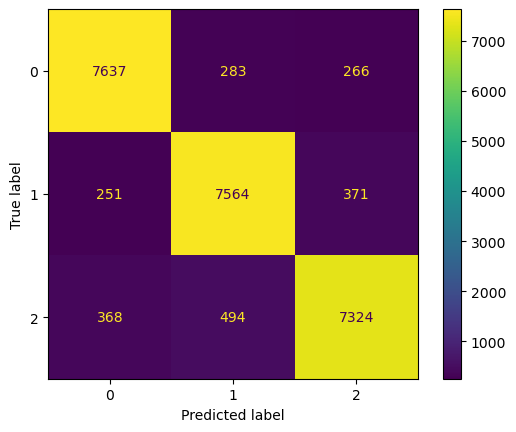

LogReg
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      8186
           1       0.54      0.50      0.52      8186
           2       0.57      0.60      0.58      8186

    accuracy                           0.62     24558
   macro avg       0.62      0.62      0.62     24558
weighted avg       0.62      0.62      0.62     24558



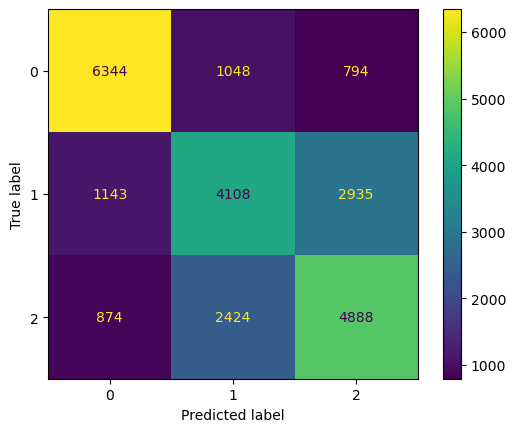

Xgboost
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      8186
           1       0.96      0.97      0.96      8186
           2       0.96      0.95      0.96      8186

    accuracy                           0.96     24558
   macro avg       0.96      0.96      0.96     24558
weighted avg       0.96      0.96      0.96     24558



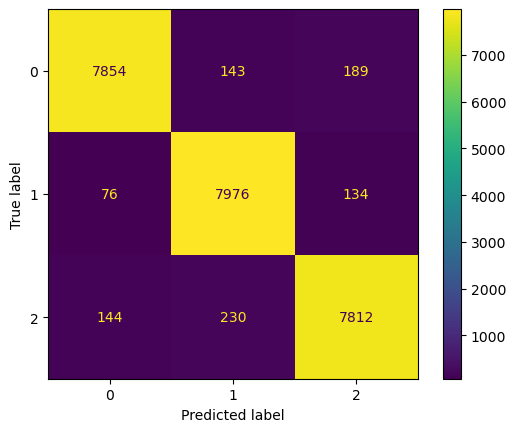

ExtraTrees
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      8186
           1       0.97      0.99      0.98      8186
           2       0.97      0.98      0.98      8186

    accuracy                           0.98     24558
   macro avg       0.98      0.98      0.98     24558
weighted avg       0.98      0.98      0.98     24558



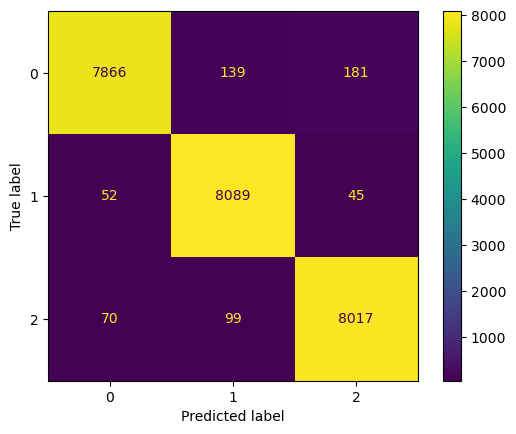

Adaboost
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      8186
           1       0.57      0.53      0.55      8186
           2       0.56      0.60      0.58      8186

    accuracy                           0.65     24558
   macro avg       0.65      0.65      0.65     24558
weighted avg       0.65      0.65      0.65     24558



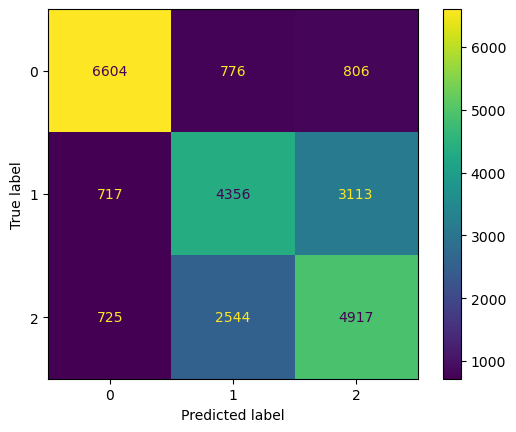

KNN
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      8186
           1       0.90      0.98      0.94      8186
           2       0.90      0.96      0.93      8186

    accuracy                           0.92     24558
   macro avg       0.92      0.92      0.92     24558
weighted avg       0.92      0.92      0.92     24558



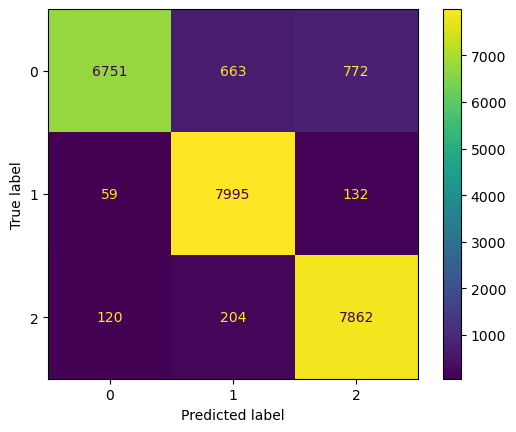

,Name,Accuracy,Precision,Recall,f1,Auc
0,Tree3,0.916728,0.917498,0.917339,0.916358,0.938454
1,LogReg3,0.624644,0.622713,0.624644,0.623238,0.792921
2,Xgboost3,0.962701,0.963293,0.962701,0.962751,0.994502
3,ExtraTrees3,0.976016,0.976496,0.976220,0.975794,0.996184
4,Adaboost3,0.646510,0.649394,0.646510,0.646955,0.816913
5,KNN3,0.920596,0.924457,0.920596,0.919579,0.983492


In [331]:
metrics_3 = model_evaluation(xtrain = xtrain_3, ytrain = ytrain_3, experiment_number = 3)

metrics_3

## Results

In [347]:
results = pd.concat([baseline, metrics_0, metrics_1, metrics_2, metrics_3], axis = 0)

results = results.sort_values(['Auc', 'f1'], ascending = [False, False])

results

,Name,Accuracy,Precision,Recall,f1,Auc
3,ExtraTrees3,0.976016,0.976496,0.976220,0.975794,0.996184
2,Xgboost3,0.962701,0.963293,0.962701,0.962751,0.994502
3,ExtraTrees1,0.937169,0.939166,0.937006,0.937256,0.990784
5,KNN3,0.920596,0.924457,0.920596,0.919579,0.983492
0,Tree1,0.932853,0.935163,0.933016,0.932880,0.980027
2,Xgboost1,0.883745,0.887162,0.883745,0.883585,0.969773
5,KNN1,0.864199,0.864564,0.864199,0.864029,0.958517
0,Tree3,0.916728,0.917498,0.917339,0.916358,0.938454
2,Xgboost0,0.826349,0.805027,0.826349,0.809567,0.906414
3,ExtraTrees0,0.832378,0.812938,0.832378,0.818510,0.906049


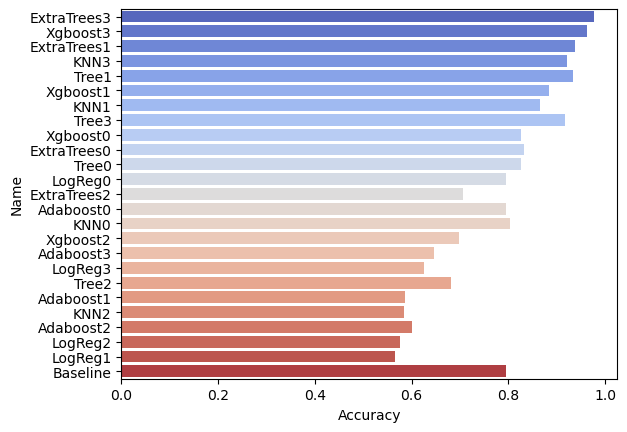

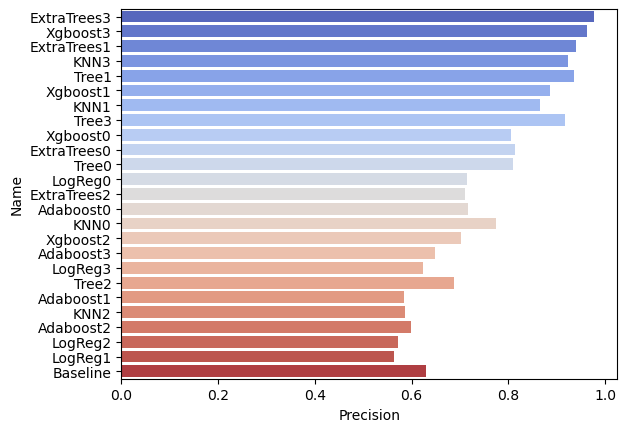

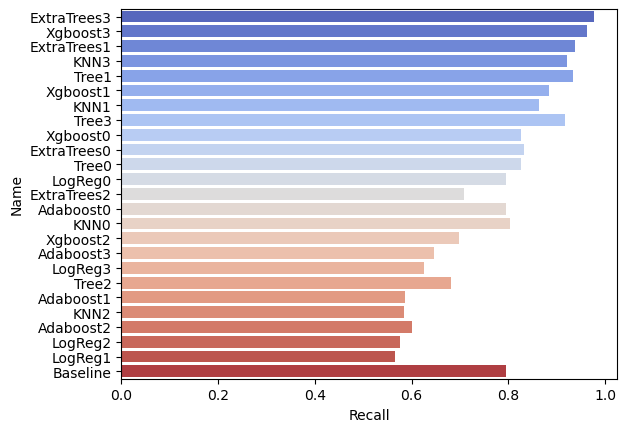

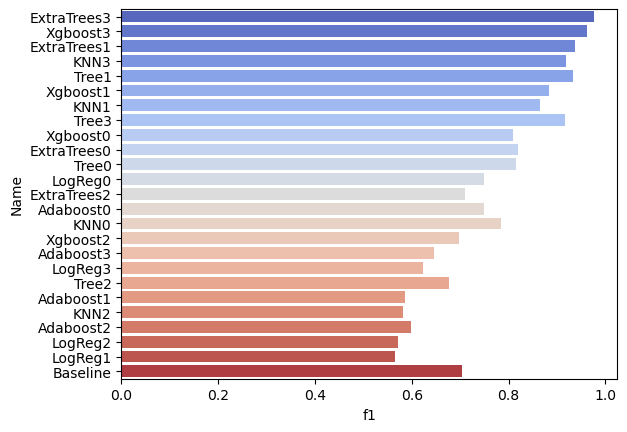

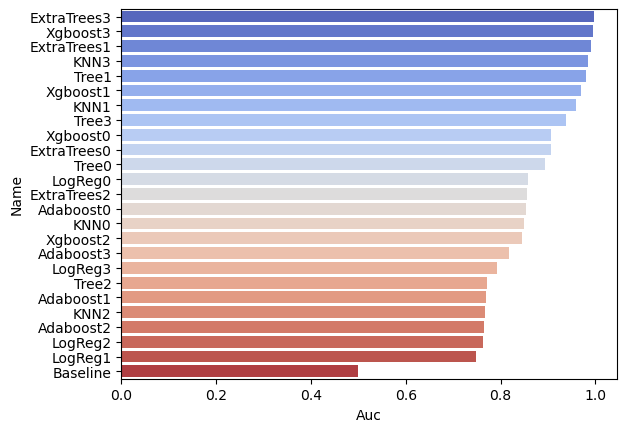

In [350]:
metrics = results.columns.tolist()[1:]

for metric in metrics:
    
    plt.figure()
    
    sns.barplot(data = results, y = 'Name', x = metric, palette = 'coolwarm')

# Training Best Preprocessor

In [431]:
xtrain = full_train.drop(target, axis = 1)
ytrain = full_train[target]


xval = validation.drop(target, axis = 1)
yval = validation[target]


xtest = test.drop(target, axis = 1)
ytest = test[target]

In [432]:
xtrain.columns, len(xtrain.columns)

(Index(['Sex', 'AGE', 'Education_years', 'MARRIED', 'Family_structure', 'RACE',
        'Occupation', 'Amount_on_homefood', 'Amount_on_takeout', 'INCOME',
        'Spending_to_income', 'Late_payment', 'Financial_Risk',
        'Fear_loan_denial', 'Use_emergency_savings',
        'Level_of_financial_literacy', 'Has_brokerage_account',
        'Traded_in_the_past_year', 'Has_financial_assets', 'Owns_home',
        'Owns_business_assets', 'Owns_non_financial_assets'],
       dtype='object'),
 22)

In [388]:
map_target = {'High':2,
             'Moderate':1,
             'Low':0}

In [389]:
ytrain = ytrain.map(map_target)

yval = yval.map(map_target)

ytest = ytest.map(map_target)

In [390]:
num_pipeline = Pipeline([
    ('scaler', MaxAbsScaler()),
    ('imputer', func_random_sample_imputer),
    ('transformation',PolynomialFeatures()),


])

cat_pipeline = Pipeline([
    ('encoder',func_count_encoder),
    ('imputer',func_random_sample_imputer),

])

preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_columns),
    ('cat_pipeline', cat_pipeline, cat_columns)
], verbose_feature_names_out = False)

In [391]:
xtrain = preprocessor.fit_transform(xtrain)

In [392]:
xval = preprocessor.transform(xval)
xtest = preprocessor.transform(xtest)

In [393]:
# sampling

smote = SMOTE()

xtrain,ytrain = smote.fit_resample(xtrain,ytrain)

In [403]:
# feature_selection

xtrain = xtrain[selected_cols3]
xval = xval[selected_cols3]
xtest = xtest[selected_cols3]

# Hyperparameter Tuning

In [376]:
ensemble = VotingClassifier([
    ('ext',ExtraTreesClassifier()),
    ('xgb',xgb.XGBClassifier())
], voting = 'soft')

In [377]:
search_space = {
    'ext__n_estimators': np.arange(100,1000),  # Number of trees in ExtraTreesClassifier
    'ext__max_depth': np.arange(1, 10),       # Maximum depth of trees in ExtraTreesClassifier
    'xgb__n_estimators': np.arange(10, 200),  # Number of boosting rounds in XGBClassifier
    'xgb__max_depth': [x for x in range(1,10)],            # Maximum depth of trees in XGBClassifier
    'xgb__learning_rate': [0.01, 0.05,0.09, 0.1, 0.2, 0.5]       # Learning rate for XGBClassifier
}

In [378]:
# Perform Bayesian optimization

np.int = int


bayes_search = BayesSearchCV(
    ensemble,
    search_space,
    n_iter=20,               # Number of iterations (adjust as needed)
    scoring='roc_auc_ovr_weighted',  # Use an appropriate scoring metric
    n_jobs=-1,               # Use all available CPUs
    cv=3,                    # Number of cross-validation folds
    random_state=42
).fit(xval, yval)

In [379]:
bayes_search.best_params_

OrderedDict([('ext__max_depth', 8),
             ('ext__n_estimators', 894),
             ('xgb__learning_rate', 0.09),
             ('xgb__max_depth', 9),
             ('xgb__n_estimators', 173)])

In [380]:
bayes_search.best_score_

0.9323896650292666

# Model Training

In [395]:
extt = ExtraTreesClassifier(n_estimators = 894,
                           max_depth = 8,
                           )

xgb_ =  xgb.XGBClassifier(n_estimators = 173,
                      max_depth = 9,
                      learning_rate = 0.09)

In [396]:
ensemble_model = VotingClassifier([
    ('ext', extt),
    ('xgb', xgb_)
], 
    voting = 'soft')

In [404]:
ensemble_model.fit(xtrain, ytrain)

VotingClassifier(estimators=[('ext',
                              ExtraTreesClassifier(max_depth=8,
                                                   n_estimators=894)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.09, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=9,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=173, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))],
                 voting='soft')

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     12551
           1       0.97      0.98      0.98     12551
           2       0.97      0.98      0.97     12551

    accuracy                           0.98     37653
   macro avg       0.98      0.98      0.98     37653
weighted avg       0.98      0.98      0.98     37653



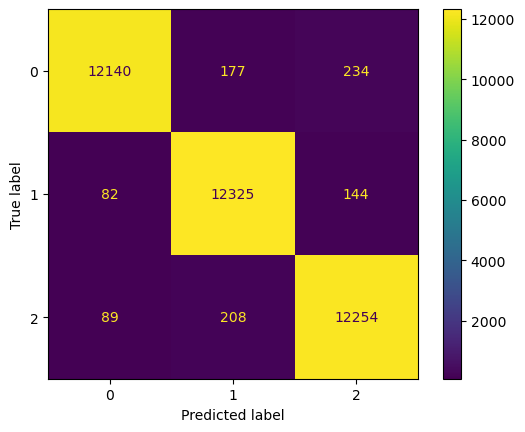

,Name,Accuracy,Precision,Recall,f1,Auc
0,Train,0.975274,0.975459,0.975274,0.975255,0.995588


In [405]:
accuracy = []
precision = []
recall = []
f1 = []
auc = []


acc = cross_val_score(ensemble_model, xtrain, ytrain, cv = 3, scoring = 'accuracy')
accuracy.append(acc.mean())

prec = cross_val_score(ensemble_model, xtrain, ytrain, cv = 3, scoring = 'precision_weighted')
precision.append(prec.mean())

rec = cross_val_score(ensemble_model, xtrain, ytrain, cv = 3, scoring = 'recall_weighted')
recall.append(rec.mean())

f1_ = cross_val_score(ensemble_model, xtrain, ytrain, cv = 3, scoring = 'f1_weighted')
f1.append(f1_.mean())

auc_ = cross_val_score(ensemble_model, xtrain, ytrain, cv = 3, scoring = 'roc_auc_ovr_weighted')
auc.append(auc_.mean())

yproba = cross_val_predict(ensemble_model, xtrain, ytrain, cv = 3)

_model_plot(ytrain, yproba)

train_result =  pd.DataFrame({
'Name': 'Train',
'Accuracy':accuracy,
'Precision':precision,
'Recall':recall,
'f1':f1,
'Auc':auc,

}, index = [0])   

train_result

# Testing

              precision    recall  f1-score   support

           0       1.00      0.60      0.75      5398
           1       0.20      0.89      0.32       483
           2       0.62      0.92      0.74       915

    accuracy                           0.66      6796
   macro avg       0.61      0.80      0.61      6796
weighted avg       0.89      0.66      0.72      6796



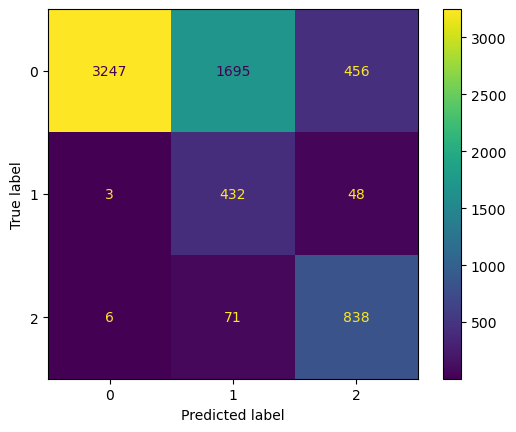

,Name,Accuracy,Precision,Recall,f1
0,Test,0.664656,0.890137,0.664656,0.718923


In [410]:
test_pred = ensemble_model.predict(xtest)

_model_plot(ytest, test_pred)

test_result =  pd.DataFrame({
'Name': 'Test',
'Accuracy':accuracy_score(ytest, test_pred),
'Precision':precision_score(ytest, test_pred, average = 'weighted'),
'Recall':recall_score(ytest, test_pred, average = 'weighted'),
'f1':f1_score(ytest, test_pred, average = 'weighted'),

}, index = [0])   

test_result

# Feature Importance 

In [416]:
# permutation importance

r = permutation_importance(ensemble_model, xtest, ytest)

values = pd.DataFrame({'Columns':xtest.columns,
                      'Importances':r.importances_mean})

<Axes: xlabel='Importances', ylabel='Columns'>

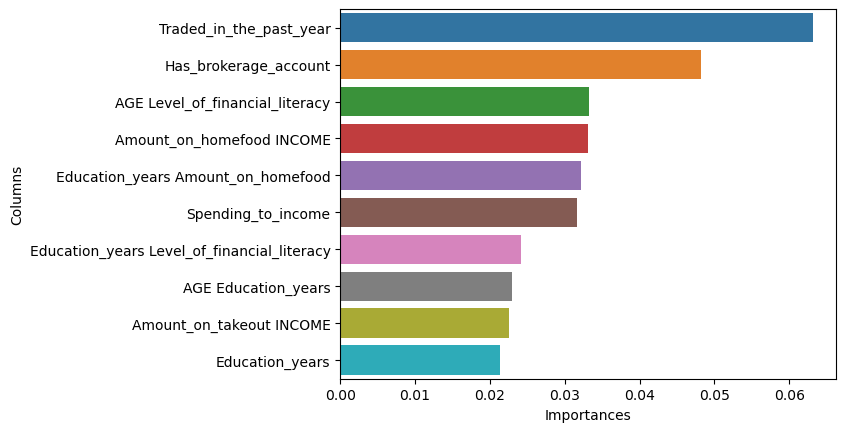

In [419]:
values = values.sort_values(by = ['Importances'], ascending = [False])

sns.barplot(data = values.head(10), y = 'Columns', x = 'Importances')

# Save Models

In [423]:
preprocessor_path  = "/Users/Oamen/OneDrive/Documents/DATASETS/Investor_risk_tolerance/preprocessor.joblib"

joblib.dump(preprocessor, preprocessor_path)

['/Users/Oamen/OneDrive/Documents/DATASETS/Investor_risk_tolerance/preprocessor.joblib']

In [424]:
preprocessor_path_pkl  = "/Users/Oamen/OneDrive/Documents/DATASETS/Investor_risk_tolerance/preprocessor_pkl.pkl"

joblib.dump(preprocessor, preprocessor_path_pkl)

['/Users/Oamen/OneDrive/Documents/DATASETS/Investor_risk_tolerance/preprocessor_pkl.pkl']

In [425]:
model_path  = "/Users/Oamen/OneDrive/Documents/DATASETS/Investor_risk_tolerance/model.joblib"

joblib.dump(ensemble_model, model_path)

['/Users/Oamen/OneDrive/Documents/DATASETS/Investor_risk_tolerance/model.joblib']

In [426]:
model_path_pkl  = "/Users/Oamen/OneDrive/Documents/DATASETS/Investor_risk_tolerance/modelPkl.pkl"

joblib.dump(ensemble_model, model_path_pkl)

['/Users/Oamen/OneDrive/Documents/DATASETS/Investor_risk_tolerance/modelPkl.pkl']

# Test Model

In [427]:
loaded_preprocessor = joblib.load(preprocessor_path_pkl)

loaded_model = joblib.load(model_path_pkl)

In [428]:
sex = input('What is your Sex(Female or Male)?')

age = eval(input('What is your Age?'))

married = input('Are you married?(Married or Single)')

Family_structure = input('What is your family structure?(Single abode,Married couple,Single Parent,Extended family,Other')

RACE = input('What is your race?(White/caucasian,Black/African-american, Hispanic/Latino,Asian,Others')

Occupation = input('What is your occupation?(Managerial/Professional,Technical/Sales/Services,Other,Not-working)')
                   
Amount_on_homefood = eval(input('How much do you spend on home-cooked food annually?'))
                   
Amount_on_takeout = eval(input('How much do you spend on takeout food annually?'))
                   
INCOME = eval(input('What is your income?'))
                   
Spending_to_income = input('What is your spending to income category?(Spending_exceeds_income,Spending_equals_income,Income_exceeds_spending)')

Late_payment = input('Any late credit payments?(Yes/No)')

Financial_Risk = input('Are you willing to take financial risks?(Yes/No)')

Fear_loan_denial = input('Do you fear being denied loans?(Yes/No)')

Use_emergency_savings = input('Do you use your savings in a financial emergency or other options like cut-backs or loans?(Yes/No)')

Level_of_financial_literacy = input('Level of financial literacy?(0,1,2,3)')

Has_brokerage_account = input('Do you have a brokerage account?(Yes/No)')

Traded_in_the_past_year = input('Have you traded in the past year?(Yes/No)')

Has_financial_assets = input('Do you have financial assets?(Yes/No)')

Owns_home = input('Do you own a home?(Yes/No)')

Owns_business_assets = input('Do you own business assets?(Yes/No)')

Owns_non_financial_assets = input('Do you own non-financial assets?(Yes/No)')

educa = eval(input('Number of years in education?'))

What is your Sex(Female or Male)?Female
What is your Age?22
Are you married?(Married or Single)Single
What is your family structure?(Single abode,Married couple,Single Parent,Extended family,OtherSingle abode
What is your race?(White/caucasian,Black/African-american, Hispanic/Latino,Asian,OthersBlack/African-american
What is your occupration?(Managerial/Professional,Technical/Sales/Services,Other,Not-working)Technical/Sales/Services
How much do you spend on home-cooked food annually?12000
How much do you spend on takeout food annually?4000
What is your income?50000
What is your spending to income category?(Spending_exceeds_income,Spending_equals_income,Income_exceeds_spending)Income_exceeds_spending
Any late credit payments?(Yes/No)No
Are you willing to take financial risks?(Yes/No)Yes
Do you fear being denied loans?(Yes/No)Yes
Do you use your savings in a financial emergency or other options like cut-backs or loans?(Yes/No)Yes
Level of financial literacy?(0,1,2,3)1
Do you have a broke

In [433]:
educa = eval(input('Number of years in education?'))

Number of years in education?16


In [441]:
data = pd.DataFrame({
    'Sex':sex, 'AGE':age, 'Education_years':educa, 'MARRIED':married, 'Family_structure':Family_structure,
    'RACE':RACE, 'Occupation':Occupation, 'Amount_on_homefood':Amount_on_homefood, 'Amount_on_takeout':Amount_on_takeout,
    'INCOME':INCOME,
    'Fear_loan_denial':Fear_loan_denial, 'Spending_to_income':Spending_to_income, 'Late_payment':Late_payment, 'Financial_Risk':Financial_Risk,
    'Use_emergency_savings':Use_emergency_savings, 'Level_of_financial_literacy':Level_of_financial_literacy,
    'Has_brokerage_account':Has_brokerage_account, 'Traded_in_the_past_year':Traded_in_the_past_year,
    'Has_financial_assets':Has_financial_assets, 'Owns_home':Owns_home, 'Owns_business_assets':Owns_business_assets,
    'Owns_non_financial_assets':Owns_non_financial_assets,
    
}, index = [0])

data

,Sex,AGE,Education_years,MARRIED,Family_structure,RACE,Occupation,Amount_on_homefood,Amount_on_takeout,INCOME,Fear_loan_denial,Spending_to_income,Late_payment,Financial_Risk,Use_emergency_savings,Level_of_financial_literacy,Has_brokerage_account,Traded_in_the_past_year,Has_financial_assets,Owns_home,Owns_business_assets,Owns_non_financial_assets
0,Female,22,16,Single,Single abode,Black/African-american,Technical/Sales/Services,12000,4000,50000,Yes,Income_exceeds_spending,No,Yes,Yes,1,No,Yes,Yes,No,No,No


In [443]:
preprocessed_data = loaded_preprocessor.transform(data)

preprocessed_data

,1,AGE,Education_years,Amount_on_homefood,Amount_on_takeout,INCOME,Level_of_financial_literacy,AGE^2,AGE Education_years,AGE Amount_on_homefood,AGE Amount_on_takeout,AGE INCOME,AGE Level_of_financial_literacy,Education_years^2,Education_years Amount_on_homefood,Education_years Amount_on_takeout,Education_years INCOME,Education_years Level_of_financial_literacy,Amount_on_homefood^2,Amount_on_homefood Amount_on_takeout,Amount_on_homefood INCOME,Amount_on_homefood Level_of_financial_literacy,Amount_on_takeout^2,Amount_on_takeout INCOME,Amount_on_takeout Level_of_financial_literacy,INCOME^2,INCOME Level_of_financial_literacy,Level_of_financial_literacy^2,Sex,MARRIED,Family_structure,RACE,Occupation,Spending_to_income,Late_payment,Financial_Risk,Fear_loan_denial,Use_emergency_savings,Has_brokerage_account,Traded_in_the_past_year,Has_financial_assets,Owns_home,Owns_business_assets,Owns_non_financial_assets
0,1.0,0.231579,1.142857,0.092308,0.016667,0.000109,0.333333,0.053629,0.264662,0.021377,0.00386,0.000025,0.077193,1.306122,0.105495,0.019048,0.000125,0.380952,0.008521,0.001538,0.00001,0.030769,0.000278,0.000002,0.005556,1.190615e-08,0.000036,0.111111,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [445]:
preprocessed_data = preprocessed_data[selected_cols3]

In [447]:
prediction = loaded_model.predict(preprocessed_data)

prediction

array([0], dtype=int64)

In [448]:
if prediction == 0:
    
    print('You are a low risk investor')
    
elif prediction == 1:
    
    print('You are a moderate risk investor')
    
elif prediction == 2:
    
    print('You are a high risk investor')

You are a low risk investor
